In [ ]:
pip install yfinance

In [1]:
from helpers import *
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import date, timedelta, datetime

/Users/irfanjamil/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
from options_helpers import *
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import CubicSpline

In [3]:
annualized_rate = .05374
r = np.log(1+annualized_rate)


In [4]:
cur_ndx_val = float(yf.Ticker('^NDX').history(period='1m').tail()['Close'])
cur_spx_val = float(yf.Ticker('^SPX').history(period='1m').tail()['Close'])

In [15]:
ndx_itm, ndx_otm, spx_itm, spx_otm = get_delayed_options_data(date.today())

In [ ]:
threshold = .05

spx_itm_temp = spx_itm[(spx_itm['strike']>cur_spx_val*(1-threshold)) & (spx_itm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_itm_temp.iterrows():
    if idx == 0 or idx == spx_itm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_itm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_itm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_itm_temp.iloc[idx-1]['midprice']) + float(spx_itm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1


ndx_itm_temp = ndx_itm[(ndx_itm['strike']>cur_ndx_val*(1-threshold)) & (ndx_itm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_dist_dict = {}
for idx, row in ndx_itm_temp.iterrows():
    if idx == 0 or idx == ndx_itm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_itm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_itm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_itm_temp.iloc[idx-1]['midprice']) + float(ndx_itm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1

        

In [ ]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX ITM implied pdf')

In [ ]:
#P(SPX > 250 eod tommorrow?)
tups = [(sp, prob) for sp, prob in spx_dist_dict.items()]
tups.sort(key=lambda x:x[0])
cumsum = 0
for x in tups:
    if x[0] < 5160:
        cumsum+=x[1]
    else:
        print(cumsum)
        break

In [ ]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX ITM implied pdf')

In [16]:
threshold = .05

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

In [10]:
spx_dist_dict

{4895.0: 0,
 4900.0: 0,
 4905.0: 0,
 4910.0: 0,
 4915.0: 0,
 4920.0: 0,
 4925.0: 0,
 4930.0: 0,
 4935.0: 0,
 4940.0: 0,
 4945.0: 0,
 4950.0: 0,
 4955.0: 0,
 4960.0: 0,
 4965.0: 0,
 4970.0: 0,
 4975.0: 0,
 4980.0: 0,
 4985.0: 0,
 4990.0: 0,
 4995.0: 0,
 5000.0: 0,
 5005.0: 0,
 5010.0: 0,
 5015.0: 0,
 5020.0: 0.01,
 5025.0: 0,
 5030.0: 0,
 5035.0: 0,
 5040.0: 0,
 5045.0: 0.004999999999999999,
 5050.0: 0,
 5055.0: 0,
 5060.0: 0,
 5065.0: 0.0050000000000000044,
 5070.0: 0,
 5075.0: 0,
 5080.0: 0.010000000000000031,
 5085.0: 0.004999999999999982,
 5090.0: 0,
 5095.0: 0.06000000000000001,
 5100.0: 0,
 5105.0: 0.06499999999999999,
 5110.0: 0.025,
 5115.0: 0.0700000000000001,
 5120.0: 0,
 5125.0: 0.28500000000000014,
 5130.0: 0,
 5135.0: 0,
 5140.0: 0.15,
 5145.0: 0,
 5150.0: 0,
 5155.0: 0.10999999999999979,
 5160.0: 0.08999999999999986,
 5165.0: 0,
 5170.0: 0.20500000000000007,
 5175.0: 0,
 5180.0: 0.08500000000000005,
 5185.0: 0,
 5190.0: 0.025,
 5195.0: 0.010000000000000009,
 5200.0: 0,
 52

In [17]:
spx_otm_temp.iloc[40:75]

,strike,bid,midprice,ask,impliedVolatility,inTheMoney,type
40,5090.0,0.35,0.375,0.40,0.124582,False,put
41,5095.0,0.50,0.525,0.55,0.123178,False,put
42,5100.0,0.60,0.625,0.65,0.118173,False,put
43,5105.0,0.75,0.775,0.80,0.113961,False,put
44,5110.0,1.15,1.175,1.20,0.114969,False,put
45,5115.0,1.30,1.350,1.40,0.109018,False,put
46,5120.0,1.80,1.825,1.85,0.106607,False,put
47,5125.0,2.50,2.525,2.55,0.105935,False,put
48,5130.0,3.00,3.100,3.20,0.101938,False,put
49,5135.0,4.00,4.050,4.10,0.098779,False,put


In [6]:
threshold = .05

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1
print(sum(spx_probs_smoothed))


ndx_otm_temp = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_dist_dict = {}
for idx, row in ndx_otm_temp.iterrows():
    if idx == 0 or idx == ndx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_otm_temp.iloc[idx-1]['midprice']) + float(ndx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1
print(sum(ndx_probs_smoothed))
        

1.24
7.2826875


Text(0.5, 1.0, 'SPX OTM implied pdf')

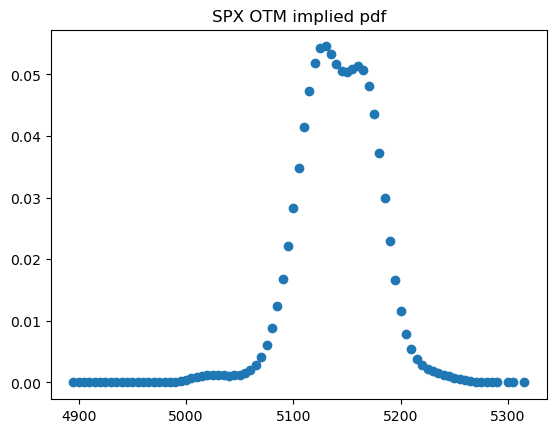

In [7]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX OTM implied pdf')

In [ ]:
#P(SPX > 5250 eod tommorrow?)
tups = [(sp, prob) for sp, prob in spx_dist_dict.items()]
tups.sort(key=lambda x:x[0])
cumsum = 0
for x in tups:
    if x[0] < 5125:
        cumsum+=x[1]
    else:
        print(cumsum)
        break

Text(0.5, 1.0, 'NDX OTM implied pdf')

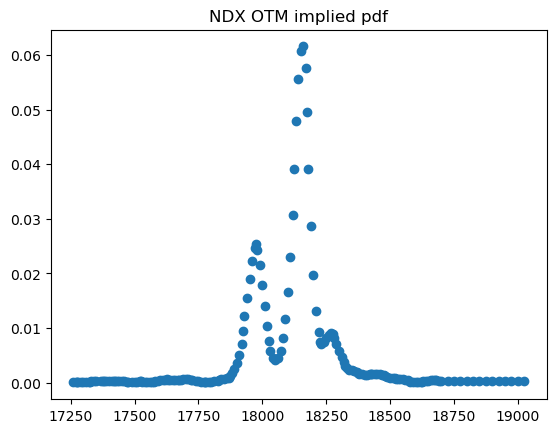

In [8]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf')

In [8]:
threshold = .025

spx_otm_temp = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
spx_otm_temp['est_iv'] = spx_otm_temp.apply(lambda x: find_vol_put(x['midprice'], cur_spx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_spx_val, x['strike'], 1/252, r), axis=1)

spx_otm_temp_iv = spx_otm_temp['est_iv']
min_strike = spx_otm_temp['strike'].describe()['min']
max_strike = spx_otm_temp['strike'].describe()['max']
cs = CubicSpline(list(spx_otm_temp['strike']), spx_otm_temp_iv)
sp_in_data = list(spx_otm_temp['strike'])
x = np.linspace(min_strike, max_strike, int(max_strike - min_strike + 1))
iv_interp = cs(x)
prices_interp = []
for i in range(x.shape[0]):
    sp = x[i]
    if sp in sp_in_data:
        prices_interp.append(float(spx_otm_temp[spx_otm_temp['strike']==sp]['midprice']))
        continue
    iv = iv_interp[i]
    if sp > cur_spx_val:
        cur_price = bs_call(cur_spx_val, sp, 1/252, r, iv)
    else:
        cur_price = bs_put(cur_spx_val, sp, 1/252, r, iv)
        
    prices_interp.append(cur_price)

spx_otm_temp = pd.DataFrame({'strike': x, 'midprice': prices_interp})



spx_dist_dict = {}
for idx, row in spx_otm_temp.iterrows():
    if idx == 0 or idx == spx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(spx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(spx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(spx_otm_temp.iloc[idx-1]['midprice']) + float(spx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    spx_dist_dict[cur_strike] = max(0,p)

spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
i = 0
for k, v in spx_dist_dict.items():
    spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
    i+=1


ndx_otm_temp = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
ndx_otm_temp['est_iv'] = ndx_otm_temp.apply(lambda x: find_vol_put(x['midprice'], cur_ndx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_ndx_val, x['strike'], 1/252, r), axis=1)

ndx_otm_temp_iv = ndx_otm_temp['est_iv']
min_strike = ndx_otm_temp['strike'].describe()['min']
max_strike = ndx_otm_temp['strike'].describe()['max']
cs = CubicSpline(list(ndx_otm_temp['strike']), ndx_otm_temp_iv)
sp_in_data = list(ndx_otm_temp['strike'])
x = np.linspace(min_strike, max_strike, int(max_strike - min_strike + 1))
iv_interp = cs(x)
prices_interp = []
for i in range(x.shape[0]):
    sp = x[i]
    if sp in sp_in_data:
        prices_interp.append(float(ndx_otm_temp[ndx_otm_temp['strike']==sp]['midprice']))
        continue
    iv = iv_interp[i]
    if sp > cur_ndx_val:
        cur_price = bs_call(cur_ndx_val, sp, 1/252, r, iv)
    else:
        cur_price = bs_put(cur_ndx_val, sp, 1/252, r, iv)
        
    prices_interp.append(cur_price)

ndx_otm_temp = pd.DataFrame({'strike': x, 'midprice': prices_interp})
    
ndx_dist_dict = {}
for idx, row in ndx_otm_temp.iterrows():
    if idx == 0 or idx == ndx_otm_temp.shape[0]-1:
        continue
    prev_strike = float(ndx_otm_temp.iloc[idx-1]['strike'])
    cur_strike = row['strike']
    next_strike = float(ndx_otm_temp.iloc[idx+1]['strike'])
    
    if next_strike - cur_strike == cur_strike - prev_strike:
        cost = float(ndx_otm_temp.iloc[idx-1]['midprice']) + float(ndx_otm_temp.iloc[idx+1]['midprice']) - 2 * row['midprice']
        prof = cur_strike - prev_strike
        p = cost/prof
    else:
        p/=2
    ndx_dist_dict[cur_strike] = max(0,p)
    
ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
i = 0
for k, v in ndx_dist_dict.items():
    ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
    i+=1

        

Text(0.5, 1.0, 'SPX OTM implied pdf with estimated iv')

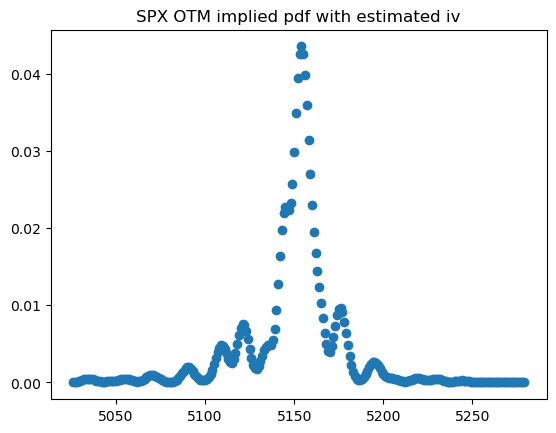

In [9]:
plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
plt.title('SPX OTM implied pdf with estimated iv')

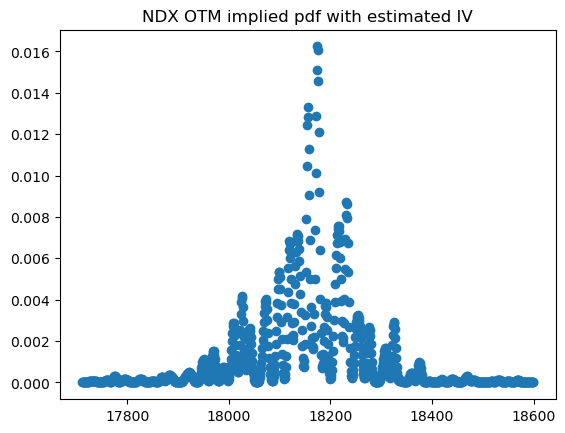

In [11]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf with estimated IV')
plt.show()

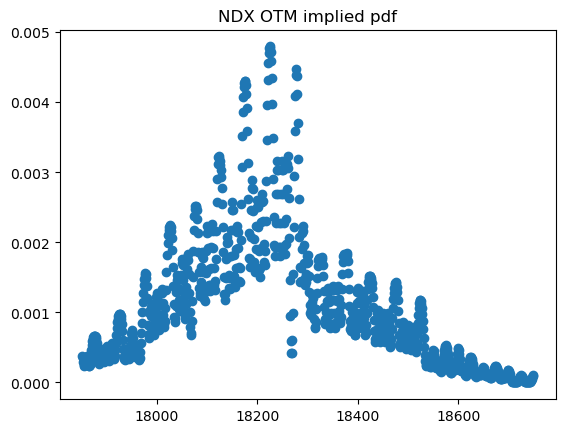

In [54]:
plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
plt.title('NDX OTM implied pdf')
plt.show()

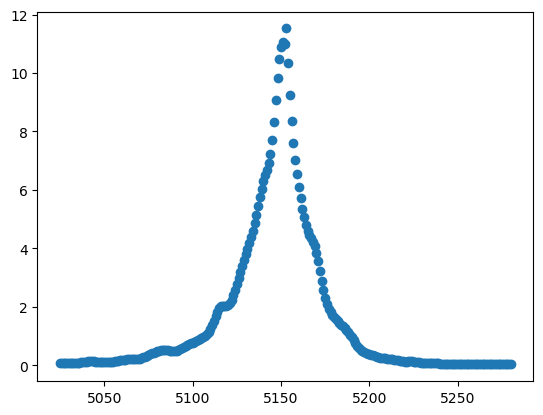

In [12]:
plt.scatter(spx_otm_temp['strike'], spx_otm_temp['midprice'])

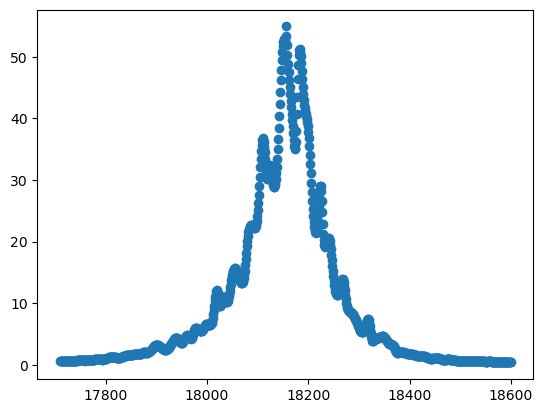

In [13]:
plt.scatter(ndx_otm_temp['strike'], ndx_otm_temp['midprice'])

In [91]:
ndx_otm_temp.iloc[200:230]

,strike,midprice
200,18050.0,2.640000e+01
201,18051.0,2.874150e+01
202,18052.0,3.150684e+01
203,18053.0,3.439404e+01
204,18054.0,3.706751e+01
205,18055.0,3.916649e+01
206,18056.0,4.031856e+01
207,18057.0,4.015707e+01
208,18058.0,3.834419e+01
209,18059.0,3.460655e+01


In [87]:
ndx_otm_temp

,strike,midprice
0,17850.0,4.725000
1,17851.0,4.760502
2,17852.0,4.797286
3,17853.0,4.835250
4,17854.0,4.874291
...,...,...
896,18746.0,1.729886
897,18747.0,1.747513
898,18748.0,1.769087
899,18749.0,1.794832


In [63]:
toy = spx_otm[(spx_otm['strike']>cur_spx_val*(1-threshold)) & (spx_otm['strike']<cur_spx_val*(1+threshold))].reset_index(drop=True)
toy['est_iv'] = toy.apply(lambda x: find_vol_put(x['midprice'], cur_spx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_spx_val, x['strike'], 1/252, r), axis=1)
toy

,strike,bid,midprice,ask,impliedVolatility,inTheMoney,type,est_iv
0,5030.0,0.25,0.325,0.40,0.161263,False,put,0.185270
1,5035.0,0.30,0.375,0.45,0.158578,False,put,0.182716
2,5040.0,0.35,0.425,0.50,0.155526,False,put,0.179636
3,5045.0,0.35,0.425,0.50,0.149911,False,put,0.173101
4,5050.0,0.40,0.475,0.55,0.146432,False,put,0.169464
5,5055.0,0.45,0.525,0.60,0.142709,False,put,0.165445
6,5060.0,0.50,0.600,0.70,0.140573,False,put,0.162250
7,5065.0,0.60,0.675,0.75,0.136239,False,put,0.158539
8,5070.0,0.65,0.750,0.85,0.133187,False,put,0.154381
9,5075.0,0.85,0.925,1.00,0.131021,False,put,0.153170


In [92]:
toy = ndx_otm[(ndx_otm['strike']>cur_ndx_val*(1-threshold)) & (ndx_otm['strike']<cur_ndx_val*(1+threshold))].reset_index(drop=True)
toy['est_iv'] = toy.apply(lambda x: find_vol_put(x['midprice'], cur_ndx_val, x['strike'], 1/252, r) if x['type'] == 'put' else find_vol_call(x['midprice'], cur_ndx_val, x['strike'], 1/252, r), axis=1)
toy

,strike,bid,midprice,ask,impliedVolatility,inTheMoney,type,est_iv
0,17850.0,2.55,4.725,6.9,0.211899,False,put,0.232145
1,17860.0,2.85,5.125,7.4,0.211281,False,put,0.231591
2,17870.0,3.20,5.550,7.9,0.210457,False,put,0.230990
3,17875.0,3.40,5.750,8.1,0.209694,False,put,0.230490
4,17880.0,3.60,6.000,8.4,0.209465,False,put,0.230334
...,...,...,...,...,...,...,...,...
99,18680.0,0.30,2.700,5.1,0.171426,False,call,0.177041
100,18690.0,0.10,2.500,4.9,0.173531,False,call,0.178437
101,18700.0,1.15,2.625,4.1,0.170922,False,call,0.183724
102,18725.0,0.30,2.000,3.7,0.175942,False,call,0.184579


In [94]:
toy.iloc[15:40]

,strike,bid,midprice,ask,impliedVolatility,inTheMoney,type,est_iv
15,17975.0,12.7,16.00,19.3,0.215798,False,put,0.241582
16,17980.0,13.3,16.50,19.7,0.214844,False,put,0.241115
17,17990.0,14.5,17.90,21.3,0.215477,False,put,0.241667
18,18000.0,15.7,18.05,20.4,0.207733,False,put,0.236830
19,18010.0,17.1,19.45,21.8,0.207459,False,put,0.236901
20,18020.0,18.6,21.05,23.5,0.207863,False,put,0.237403
21,18025.0,19.3,21.80,24.3,0.207802,False,put,0.237336
22,18030.0,20.1,22.70,25.3,0.208267,False,put,0.237733
23,18040.0,21.8,24.50,27.2,0.208672,False,put,0.238246
24,18050.0,23.6,26.40,29.2,0.209061,False,put,0.238744


In [23]:
import requests

url = 'https://api.polygon.io/v2/aggs/ticker/{}/range/{}/{}/{}/{}'.format('O:SPXW240307C05120000', '1', 'hour', '2024-03-07', '2024-03-07')
params_ = {'adjusted': 'true', 'sort': 'asc', 'apiKey' : 'vGQU0FoV2y68f1aA4hFlncpgRNiJVroO'}
r = requests.get(url, params=params_)


In [24]:
r.json()

{'ticker': 'O:SPXW240307C05120000',
 'queryCount': 242,
 'resultsCount': 7,
 'adjusted': True,
 'results': [{'v': 753,
   'vw': 20.928,
   'o': 23.6,
   'c': 23.9,
   'h': 26.46,
   'l': 16.14,
   't': 1709820000000,
   'n': 348},
  {'v': 526,
   'vw': 28.3277,
   'o': 23.6,
   'c': 31.5,
   'h': 36.91,
   'l': 22,
   't': 1709823600000,
   'n': 162},
  {'v': 296,
   'vw': 30.2943,
   'o': 30.75,
   'c': 34.6,
   'h': 34.9,
   'l': 27,
   't': 1709827200000,
   'n': 77},
  {'v': 322,
   'vw': 32.9274,
   'o': 34.36,
   'c': 32.7,
   'h': 36.5,
   'l': 29.3,
   't': 1709830800000,
   'n': 78},
  {'v': 196,
   'vw': 37.872,
   'o': 33,
   'c': 43.6,
   'h': 46,
   'l': 31.1,
   't': 1709834400000,
   'n': 62},
  {'v': 142,
   'vw': 40.2915,
   'o': 43.1,
   'c': 36.38,
   'h': 44.3,
   'l': 35.03,
   't': 1709838000000,
   'n': 70},
  {'v': 176,
   'vw': 35.954,
   'o': 35,
   'c': 38.6,
   'h': 42.19,
   'l': 29.7,
   't': 1709841600000,
   'n': 59}],
 'status': 'OK',
 'request_id': '08

In [28]:
datetime.fromtimestamp(1709841600000/1000)

datetime.datetime(2024, 3, 7, 15, 0)

In [29]:
from helpers import *

In [30]:
ndx_df, spx_df = get_ndx_spx_data()

In [40]:
ndx_df, spx_df = get_ndx_spx_data()
ndx_df = ndx_df[ndx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open']].reset_index(drop=True)
spx_df = spx_df[spx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open']].reset_index(drop=True)

In [76]:
'''
gets hourly SPX and NDX options data on an hourly basis for 2024 onwards from Polygon and stores data in df
'''

params_ = {'adjusted': 'true', 'sort': 'asc', 'apiKey' : 'vGQU0FoV2y68f1aA4hFlncpgRNiJVroO'}
d = {'underlying': [], 'strike': [], 'type': [], 'date': [], 'ts': [], 'open': []}

ndx_df, spx_df = get_ndx_spx_data()
    
ndx_df = ndx_df[ndx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open', 'Close']].reset_index(drop=True)
spx_df = spx_df[spx_df['Date'] >= date(2024, 1, 1)][['Date', 'Open', 'Close']].reset_index(drop=True) #get daily index data for 2024 onwards

exception_rate = []

# -- NDX below --

for idx, row in ndx_df.iterrows():
    cur_dt = row['Date']
    year = str(cur_dt.year - 2000)
    month = cur_dt.month
    if month < 10:
        month = '0' + str(month)
    else:
        month = str(month)
    day = cur_dt.day
    if day < 10:
        day = '0' + str(day)
    else:
        day = str(day)
        
    open_ = row['Open']
    #get OTM calls and puts data
    lb_call_strike = open_ + 10 - open_ % 10
    ub_put_strike = open_ - open_ % 10
    call_strikes = np.arange(lb_call_strike, lb_call_strike + 500, 10)
    put_strikes = np.arange(ub_put_strike - 500, ub_put_strike + 10, 10)
    strikes = list(call_strikes) + list(put_strikes)
    day_data_ret_err = 0
    for sp in strikes:

        put_ticker = 'NDXP' + year + month + day + 'P' +  str(int(sp)) + '000'
        call_ticker = 'NDXP'+ year + month + day + 'C' + str(int(sp)) + '000'
        put_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(put_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        call_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(call_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        
        r = requests.get(put_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('NDX')
                d['type'].append('put')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['open'].append(option_open)
        except:
            day_data_ret_err += 1
            
        r = requests.get(call_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('NDX')
                d['type'].append('call')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['open'].append(option_open)
        except:
            day_data_ret_err += 1
        
        
    if day_data_ret_err > 0:
        exception_rate.append(day_data_ret_err/(2*len(strikes)))

# -- SPX below --

for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    year = str(cur_dt.year - 2000)
    month = cur_dt.month
    if month < 10:
        month = '0' + str(month)
    else:
        month = str(month)
    day = cur_dt.day
    if day < 10:
        day = '0' + str(day)
    else:
        day = str(day)
        
    open_ = row['Open']
    #get OTM calls and puts data
    lb_call_strike = open_ + 5 - open_ % 5
    ub_put_strike = open_ - open_ % 5
    call_strikes = np.arange(lb_call_strike, lb_call_strike + 155, 5)
    put_strikes = np.arange(ub_put_strike - 150, ub_put_strike + 5, 5)
    strikes = list(call_strikes) + list(put_strikes)
    day_data_ret_err = 0
    for sp in strikes:

        put_ticker = 'SPXW' + year + month + day + 'P' + '0' + str(int(sp)) + '000'
        call_ticker = 'SPXW'+ year + month + day + 'C' + '0' + str(int(sp)) + '000'
        put_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(put_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        call_url = 'https://api.polygon.io/v2/aggs/ticker/O:{}/range/{}/{}/{}/{}'.format(call_ticker, '1', 'hour', cur_dt.isoformat(), cur_dt.isoformat())
        
        r = requests.get(put_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('SPX')
                d['type'].append('put')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['open'].append(option_open)
        except:
            day_data_ret_err += 1
            
        r = requests.get(call_url, params=params_).json()
        try:
            for res in r['results']:
                option_open = res['o']
                ts = res['t']/1000
                d['strike'].append(int(sp))
                d['underlying'].append('SPX')
                d['type'].append('call')
                d['date'].append(cur_dt)
                d['ts'].append(datetime.fromtimestamp(ts))
                d['open'].append(option_open)
        except:
            day_data_ret_err += 1
        
        
    if day_data_ret_err > 0:
        exception_rate.append(day_data_ret_err/(2*len(strikes)))

print(sum(exception_rate)/len(exception_rate))
df = pd.DataFrame(data=d)

0.1908081165014236


In [77]:
df

,underlying,strike,type,date,ts,open
0,NDX,16670,put,2024-01-02,2024-01-02 09:00:00,43.12
1,NDX,16670,put,2024-01-02,2024-01-02 10:00:00,73.00
2,NDX,16670,put,2024-01-02,2024-01-02 11:00:00,69.28
3,NDX,16670,put,2024-01-02,2024-01-02 13:00:00,103.00
4,NDX,16670,put,2024-01-02,2024-01-02 14:00:00,178.76
...,...,...,...,...,...,...
61500,SPX,5160,call,2024-03-08,2024-03-08 11:00:00,25.00
61501,SPX,5160,call,2024-03-08,2024-03-08 12:00:00,5.30
61502,SPX,5160,call,2024-03-08,2024-03-08 13:00:00,1.85
61503,SPX,5160,call,2024-03-08,2024-03-08 14:00:00,0.47


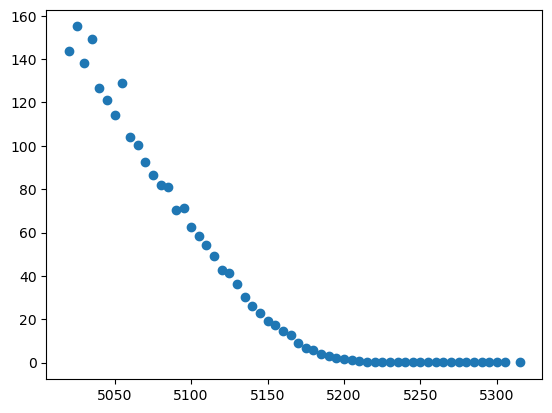

In [105]:
a = df[(df['ts'] == datetime(2024, 3, 8, 9)) & (df['underlying']=='SPX') & (df['type']=='call')]
plt.scatter(a['strike'], a['open'])

In [90]:
ndx_hourly = yf.Ticker('^NDX').history(interval='1h').reset_index()[['Datetime','Open', 'Close']]
ndx_hourly['Datetime'] = ndx_hourly.apply(lambda x: datetime(x['Datetime'].year, x['Datetime'].month, x['Datetime'].day, x['Datetime'].hour), axis=1)
spx_hourly = yf.Ticker('^SPX').history(interval='1h').reset_index()[['Datetime', 'Open', 'Close']] #get as much hourly data as yfinance allows for
spx_hourly['Datetime'] = spx_hourly.apply(lambda x: datetime(x['Datetime'].year, x['Datetime'].month, x['Datetime'].day, x['Datetime'].hour), axis=1)

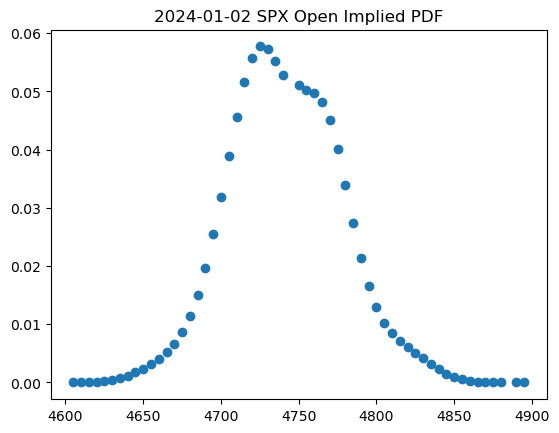

0.8340000000000002


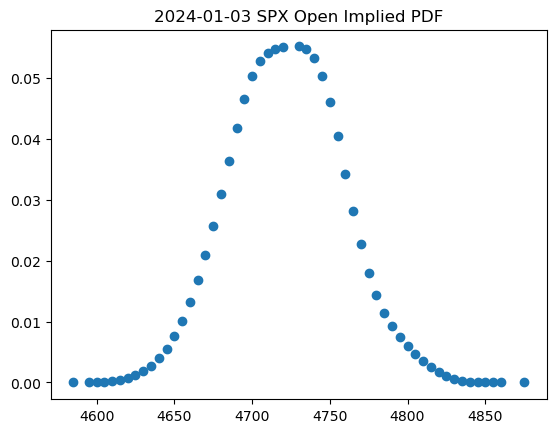

0.8899999999999997


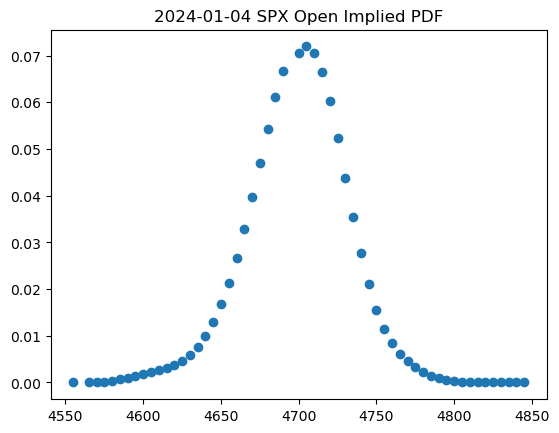

0.9009999999999996


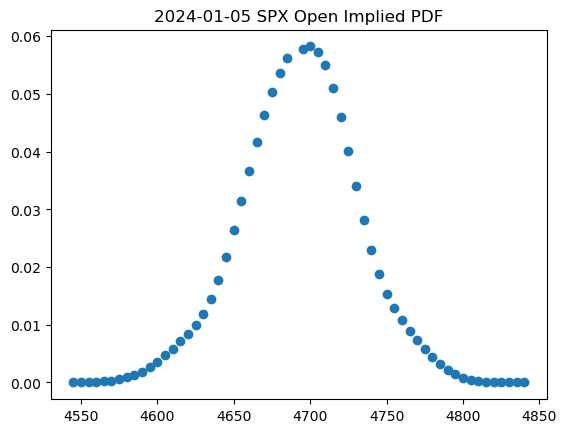

0.992


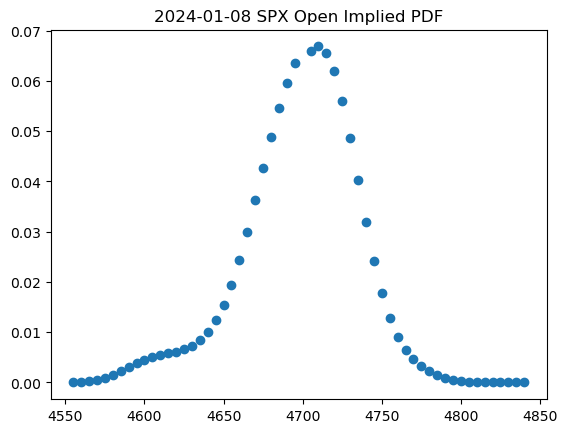

0.833


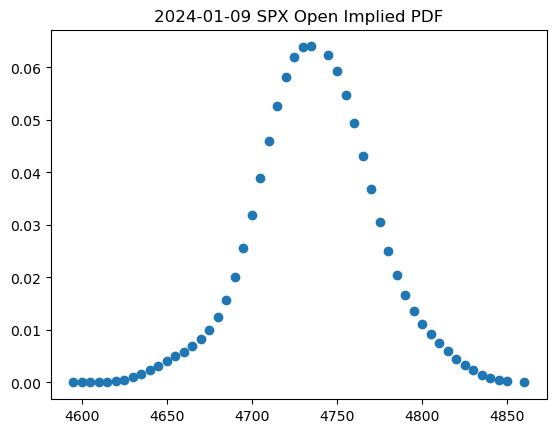

0.8429999999999993


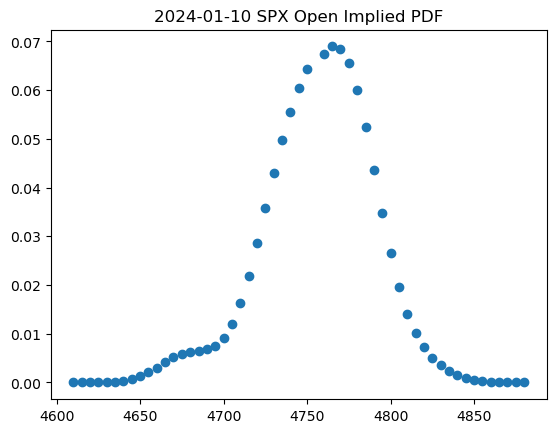

0.7335000000000003


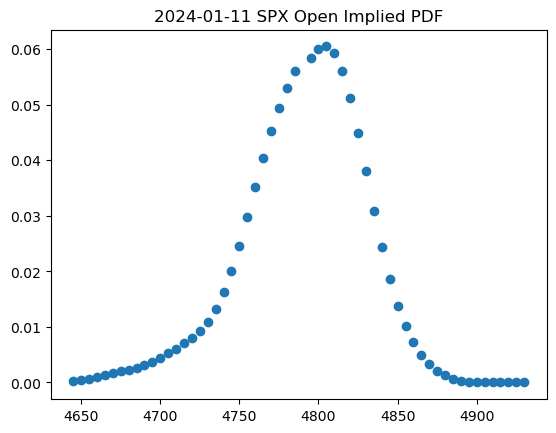

0.8549999999999995


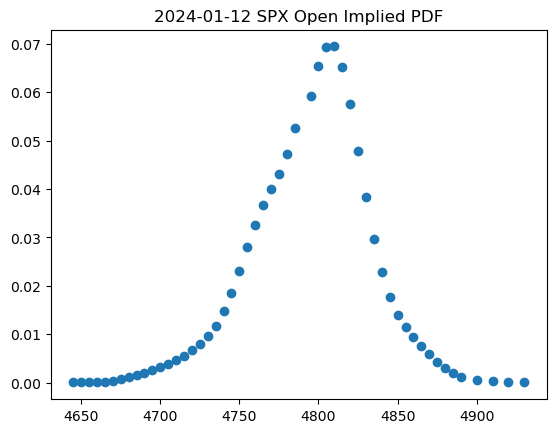

0.9780000000000002


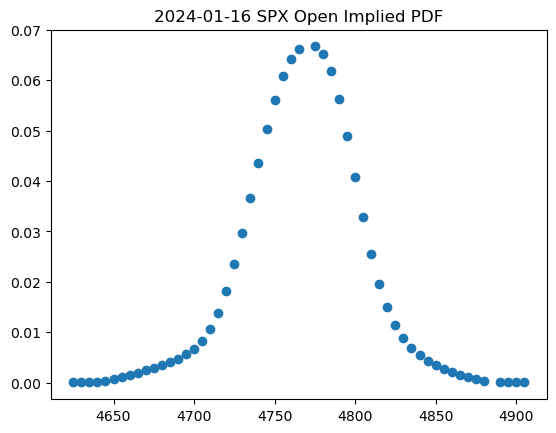

0.9100000000000007


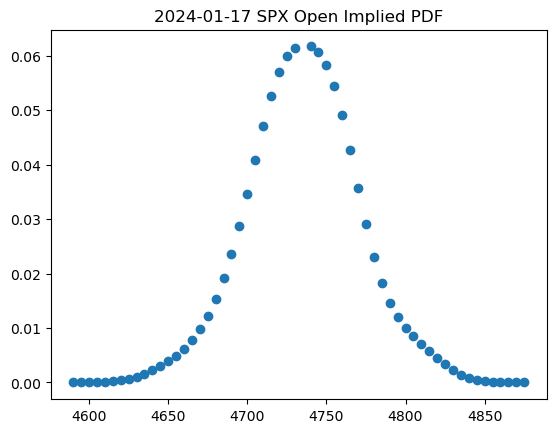

0.9510000000000003


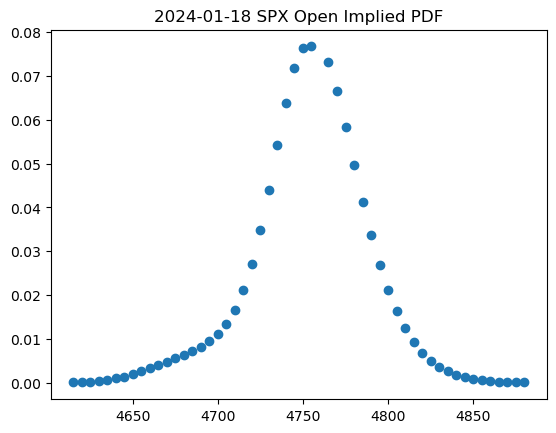

1.0789999999999995


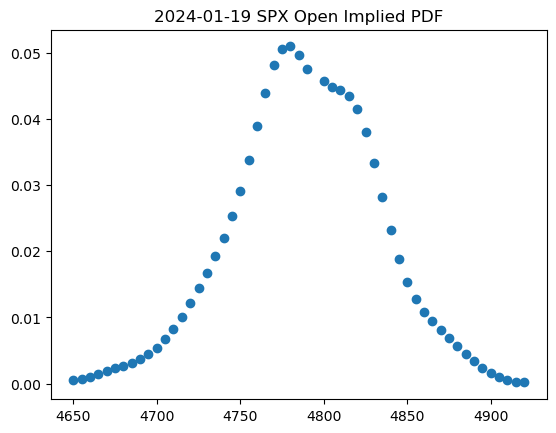

0.8820000000000005


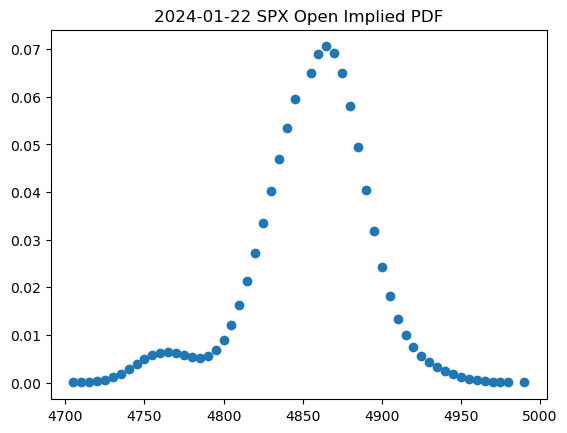

0.8524999999999999


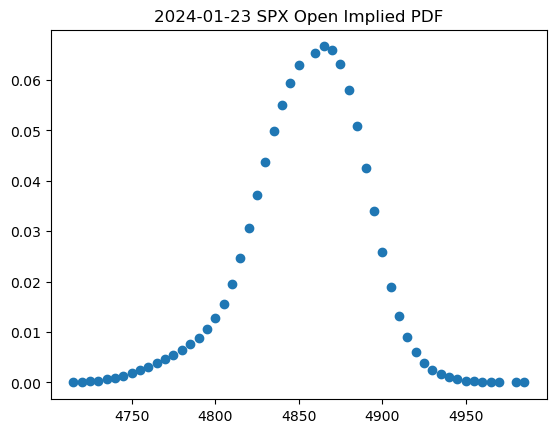

0.7830000000000001


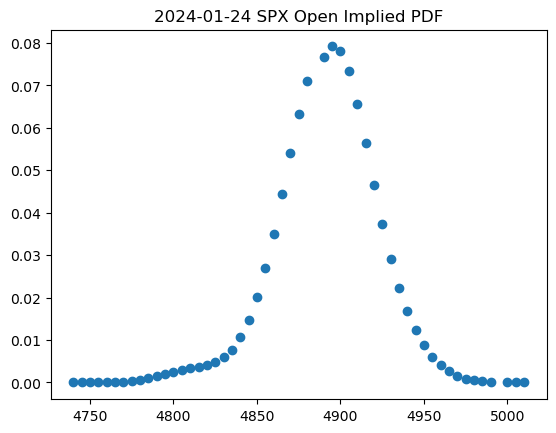

0.9995000000000003


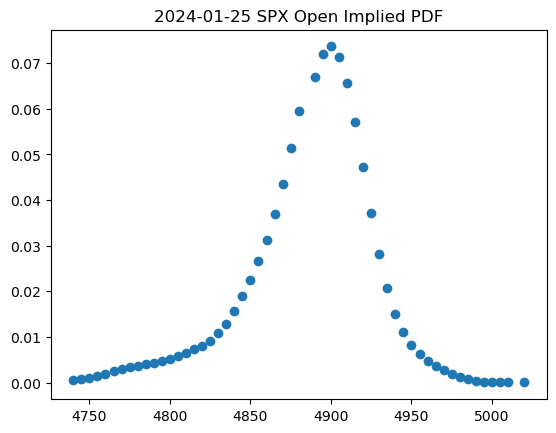

1.0809999999999995


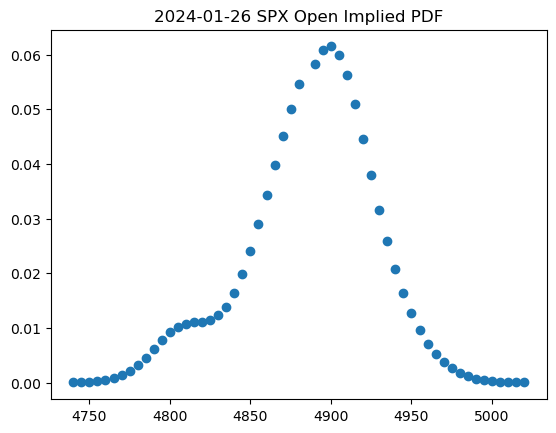

0.9539999999999993


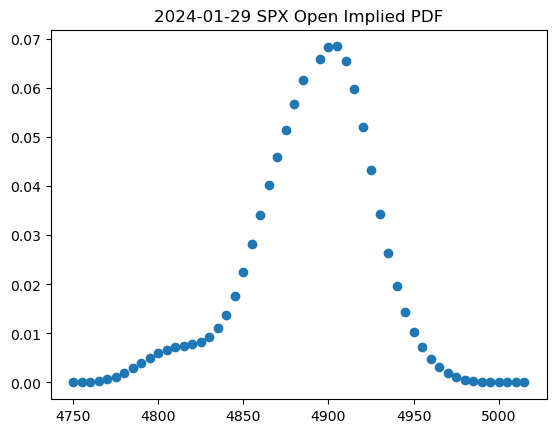

0.8300000000000004


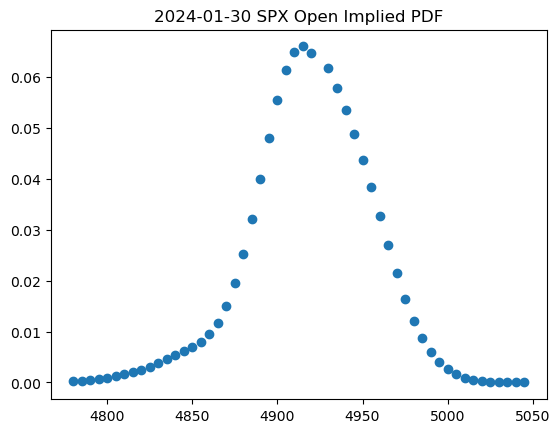

0.8170000000000004


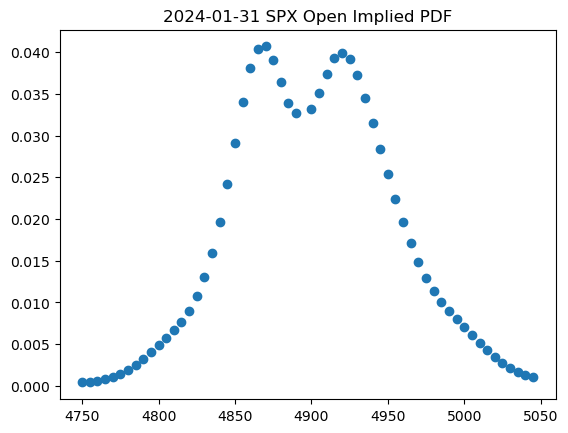

0.9305000000000008


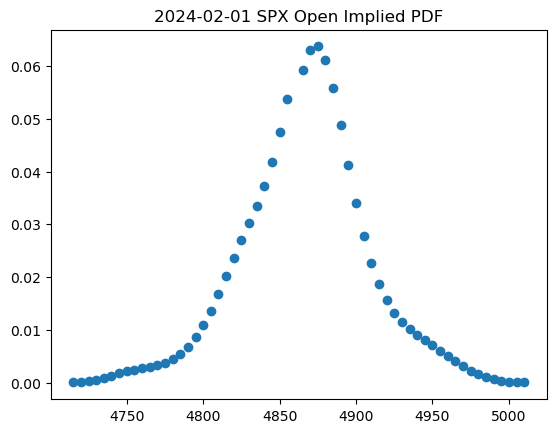

1.0420000000000003


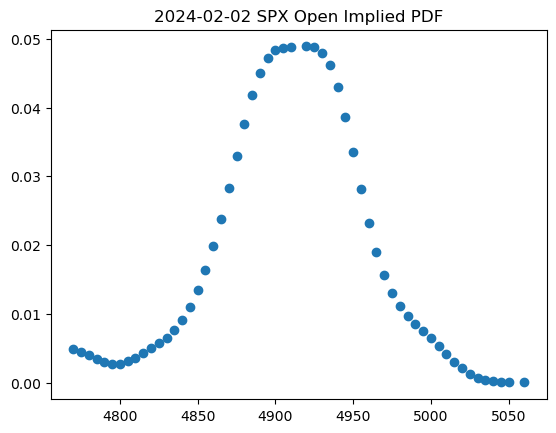

0.9379999999999998


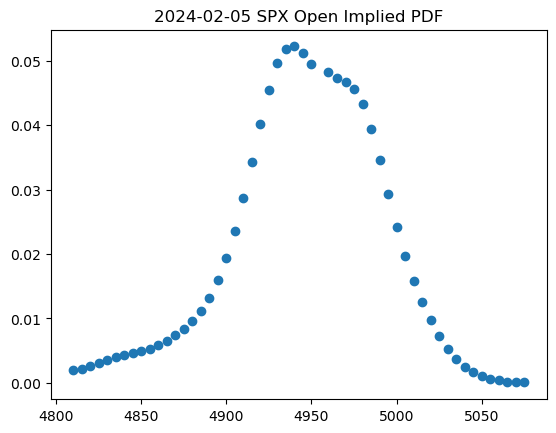

0.8469999999999999


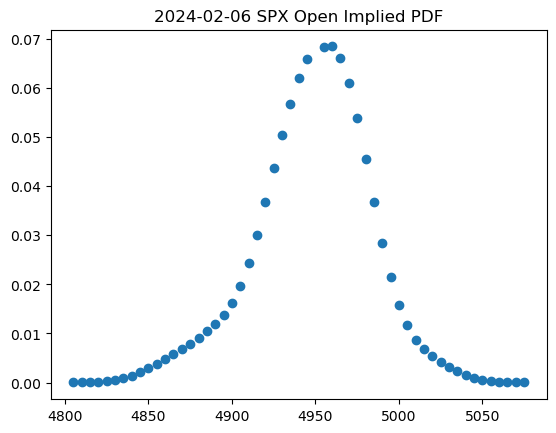

0.8660000000000002


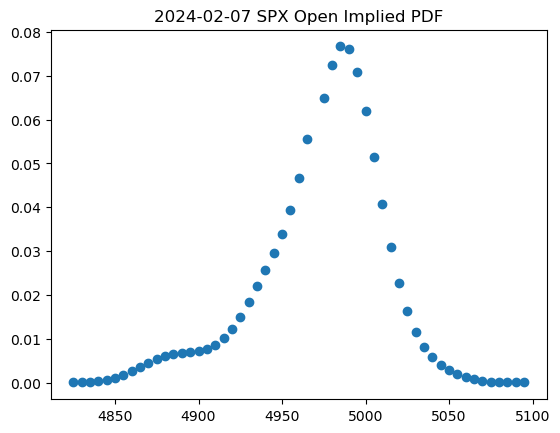

0.9300000000000004


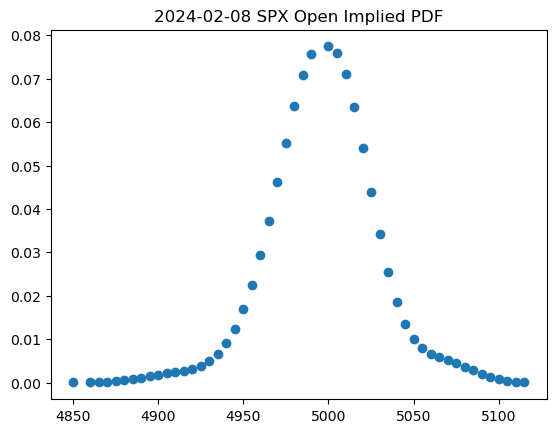

1.1499999999999992


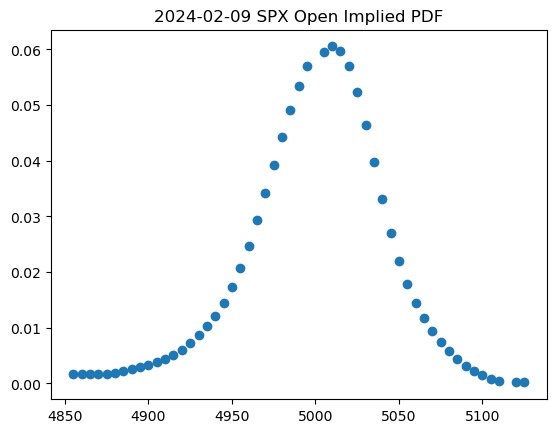

0.9009999999999994


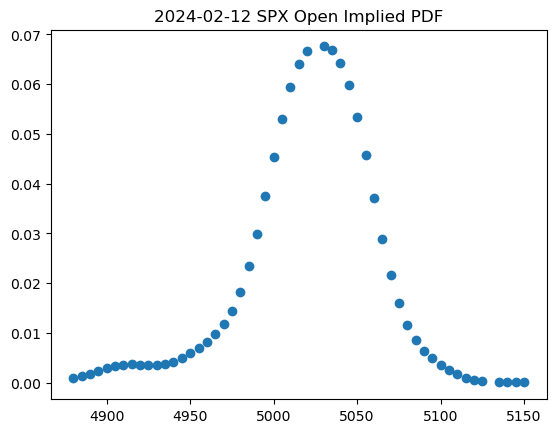

0.8130000000000007


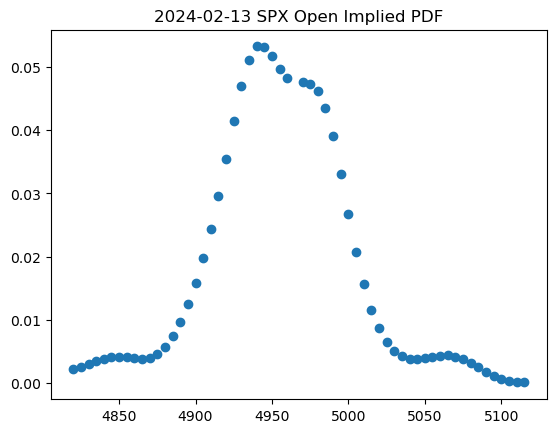

1.2900000000000014


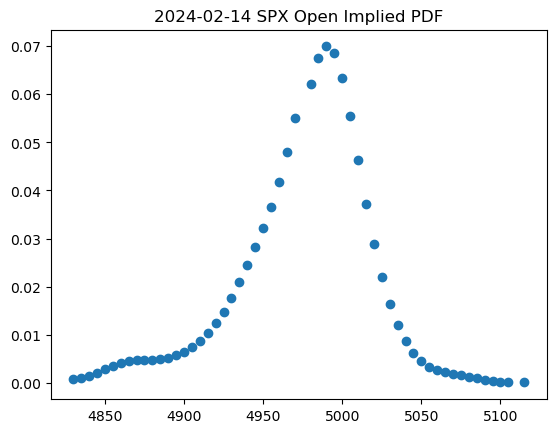

0.9294999999999999


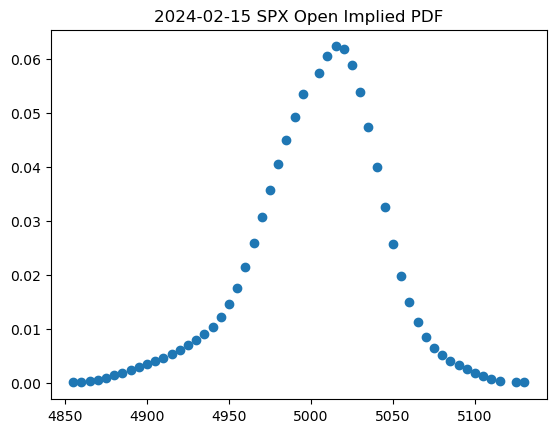

0.8799999999999996


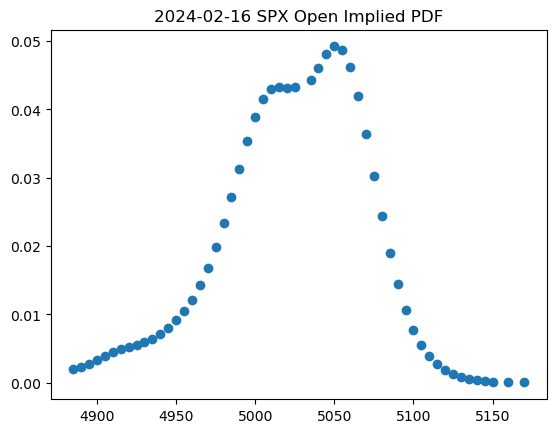

0.8109999999999999


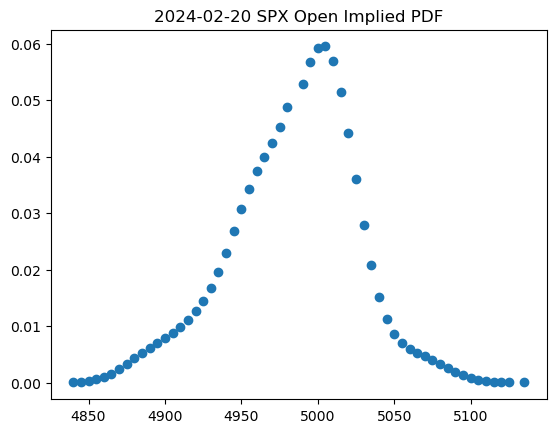

0.8290000000000005


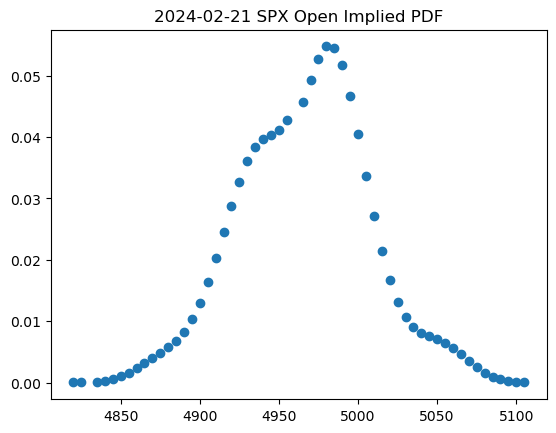

0.8299999999999997


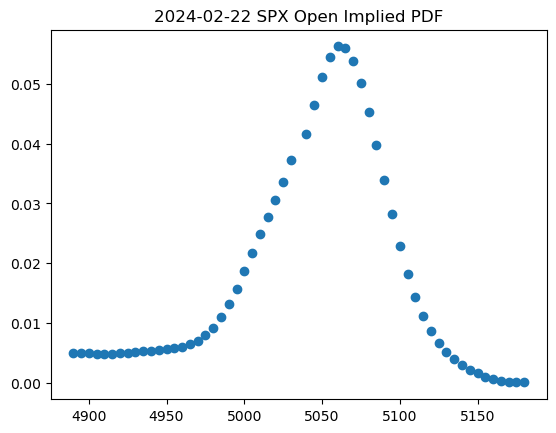

0.955


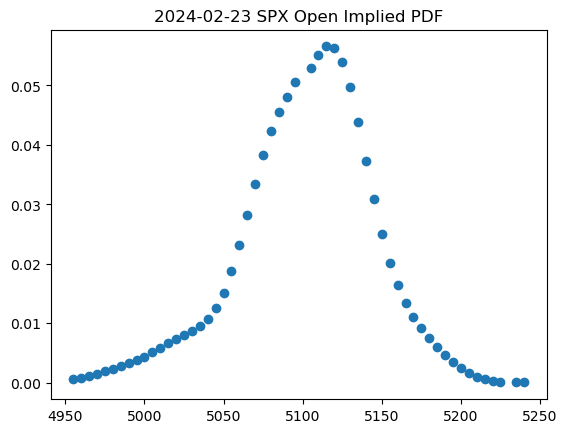

0.8650000000000008


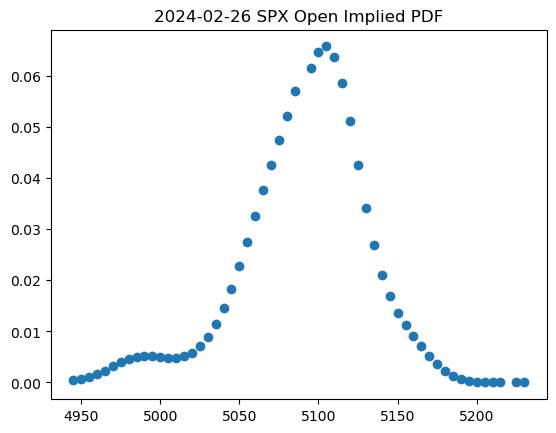

0.8580000000000001


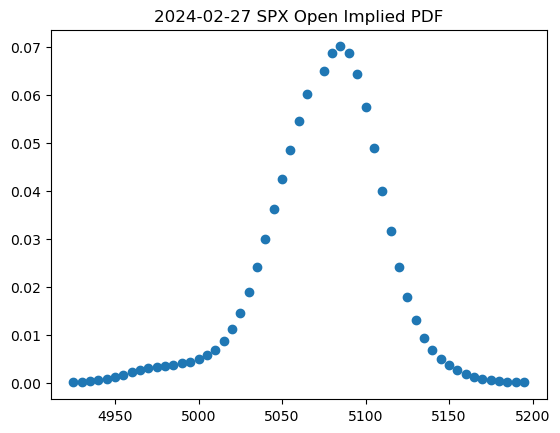

0.8729999999999996


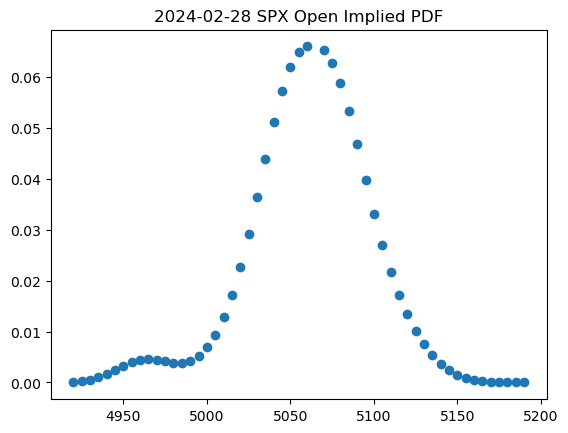

0.8810000000000006


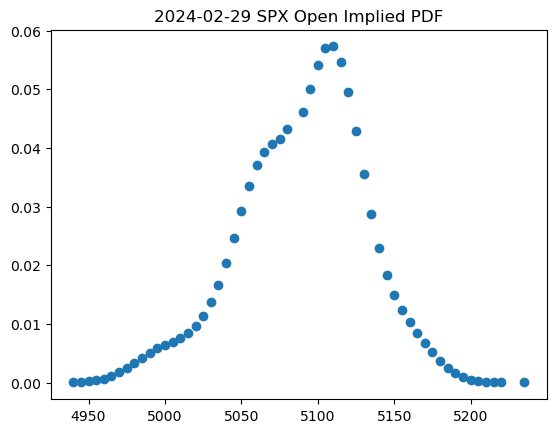

1.1059999999999999


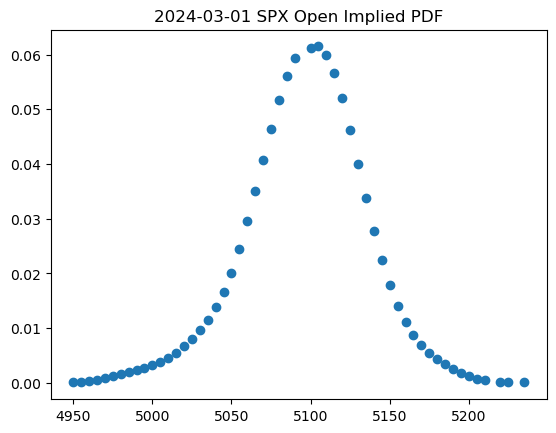

0.9749999999999999


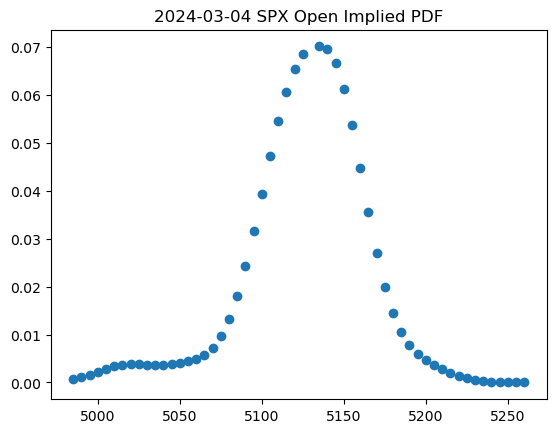

0.804


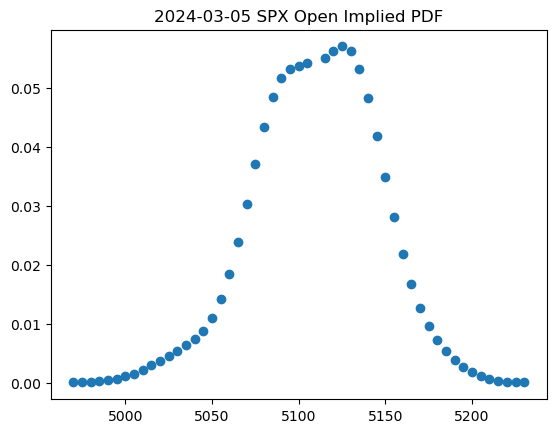

0.7349999999999998


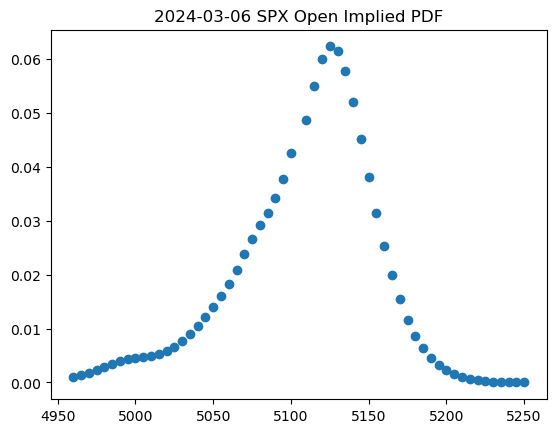

0.9649999999999993


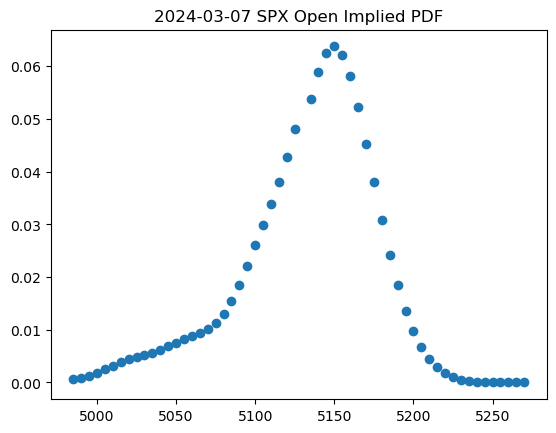

0.9050000000000002


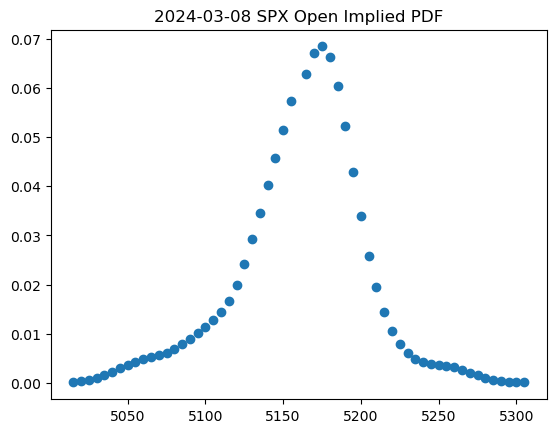

1.4859999999999995


In [98]:
'''
using Polygon options data, plots beginning of day implied pdf derived from 0dte option on SPX
'''
for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    open_ = row['Open'] - row['Open'] % 5
    close = row['Close']
    temp_calls = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='call') & (df['strike']>open_)]
    temp_puts = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='put') & (df['strike'] < open_)]
    temp_df = pd.concat([temp_calls, temp_puts], ignore_index=True).sort_values(by=['strike']).reset_index(drop=True)
    spx_dist_dict = {}
    p = 0
    for idx, row in temp_df.iterrows():
        if idx == 0 or idx == temp_df.shape[0]-1:
            continue
        prev_strike = float(temp_df.iloc[idx-1]['strike'])
        cur_strike = row['strike']
        next_strike = float(temp_df.iloc[idx+1]['strike'])

        if next_strike - cur_strike == cur_strike - prev_strike:
            cost = float(temp_df.iloc[idx-1]['open']) + float(temp_df.iloc[idx+1]['open']) - 2 * row['open']
            prof = cur_strike - prev_strike
            p = cost/prof
        else:
            p/=2
        spx_dist_dict[cur_strike] = max(0,p)

    spx_probs_smoothed = gaussian_filter1d(list(spx_dist_dict.values()), 3)
    i = 0
    for k, v in spx_dist_dict.items():
        spx_dist_dict[k] = spx_probs_smoothed[i]/sum(spx_probs_smoothed)
        i+=1
    plt.scatter(spx_dist_dict.keys(), spx_dist_dict.values())
    plt.title('{} SPX Open Implied PDF'.format((cur_dt.isoformat())))
    plt.show()
    print(sum(spx_probs_smoothed))
    #break

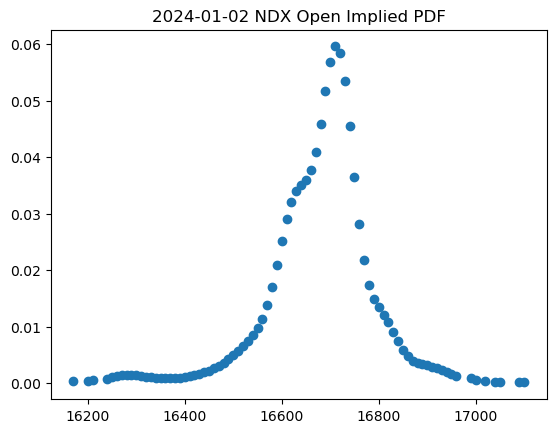

15.607593750000005


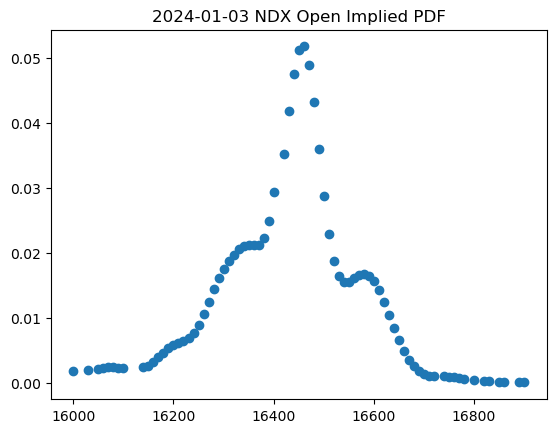

7.9602499999999985


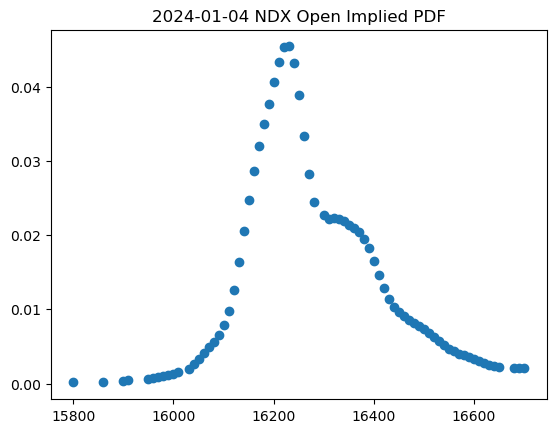

6.9355


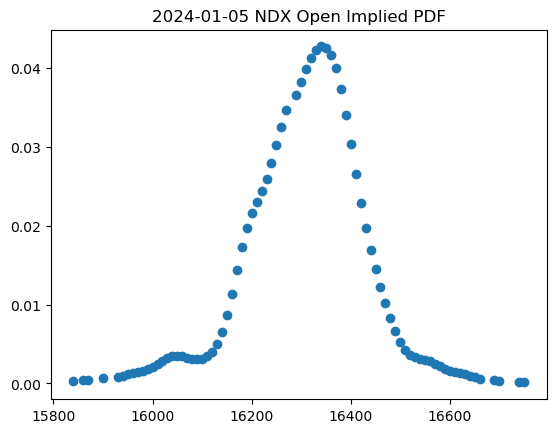

7.481000000000002


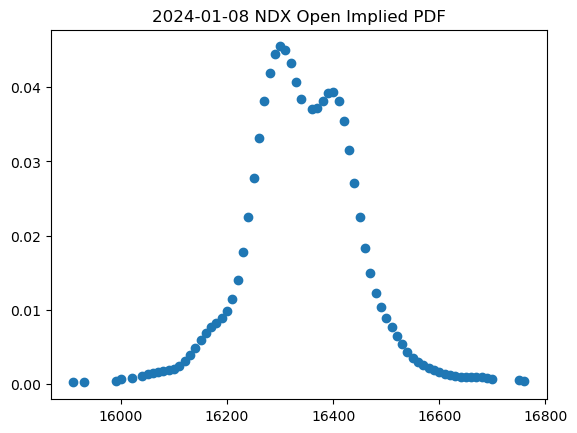

11.056999999999992


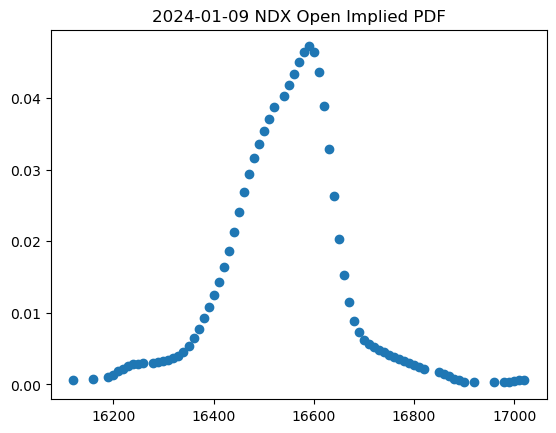

8.161625000000004


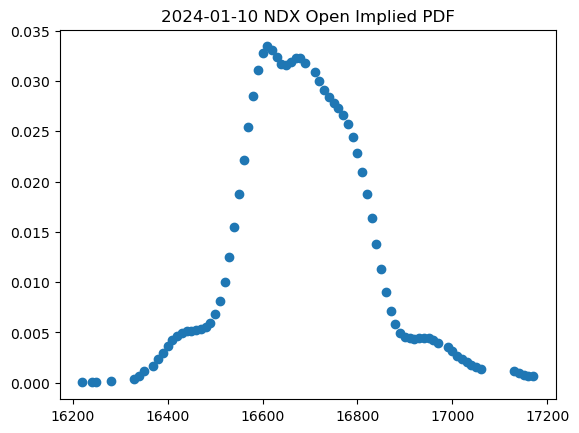

5.28475


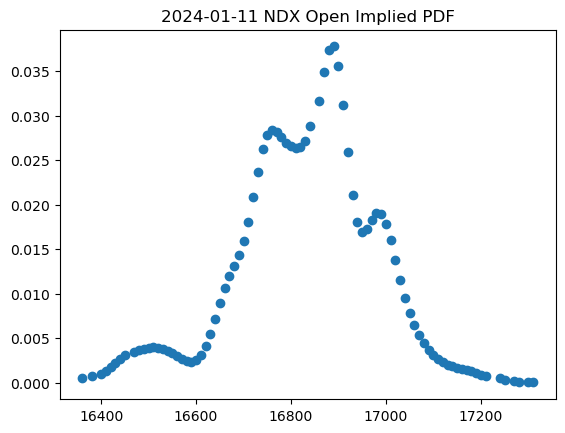

6.6327500000000015


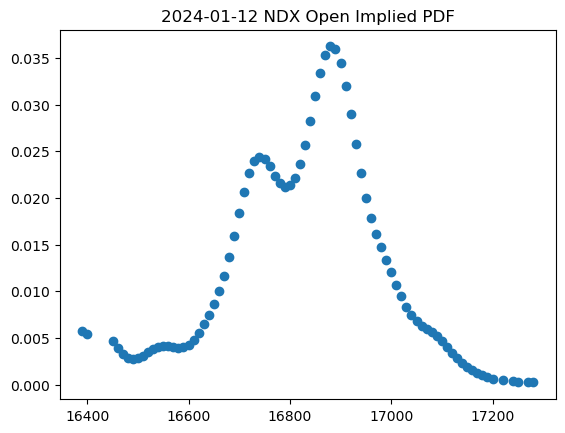

7.9258437499999985


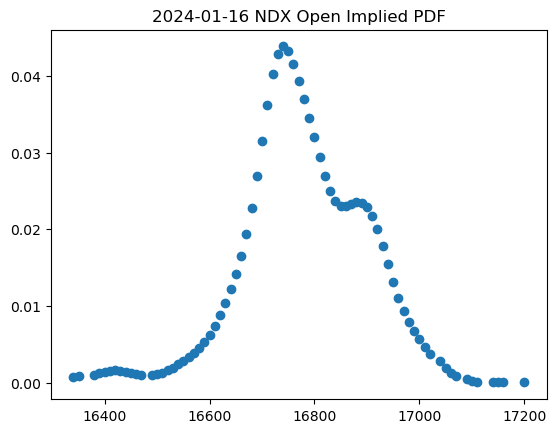

11.27575


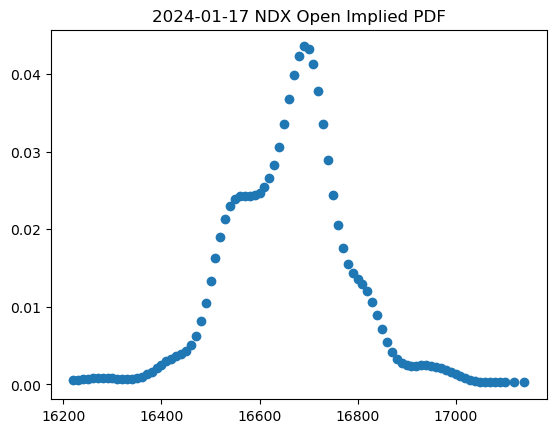

26.977999999999994


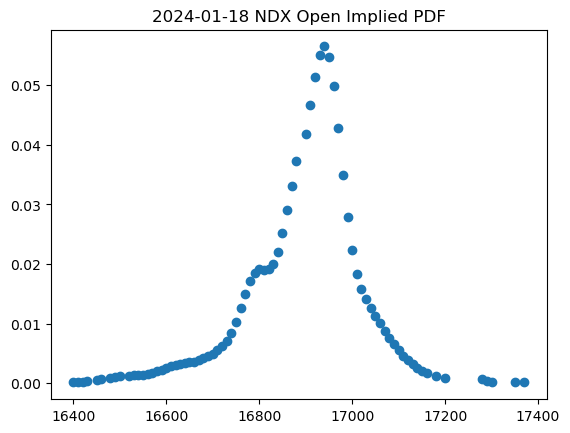

7.589875


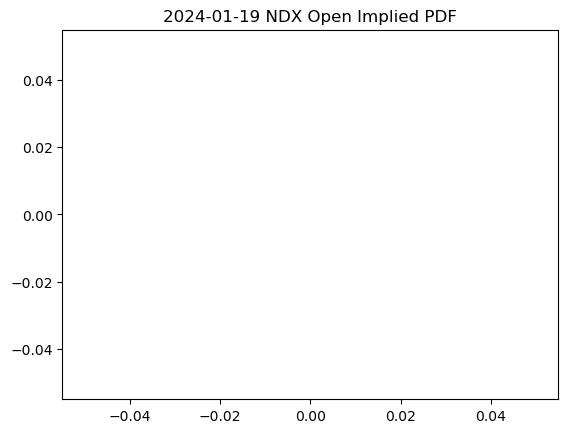

0


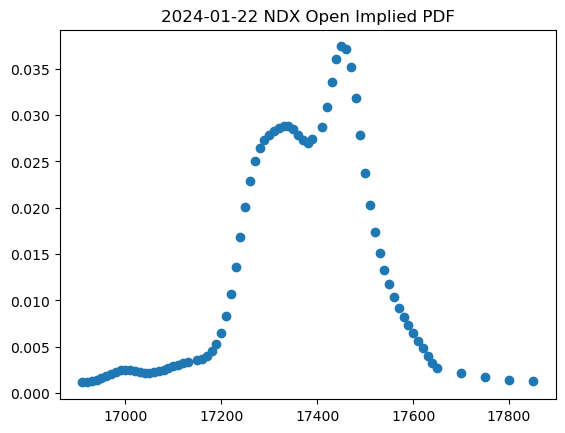

8.58405


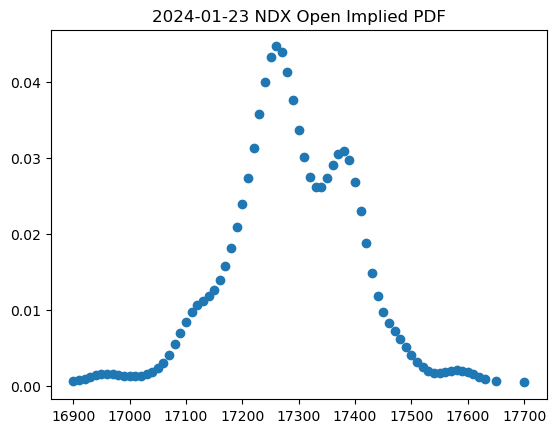

15.850999999999994


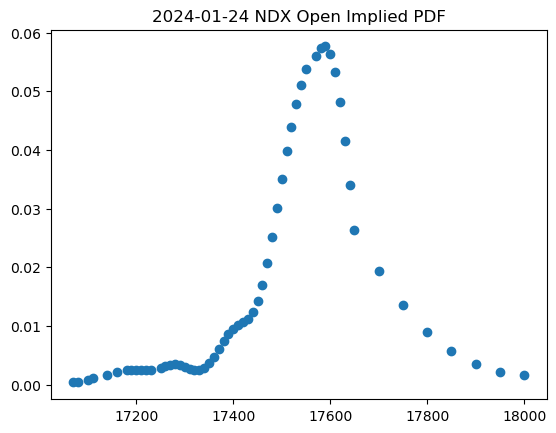

8.181250000000002


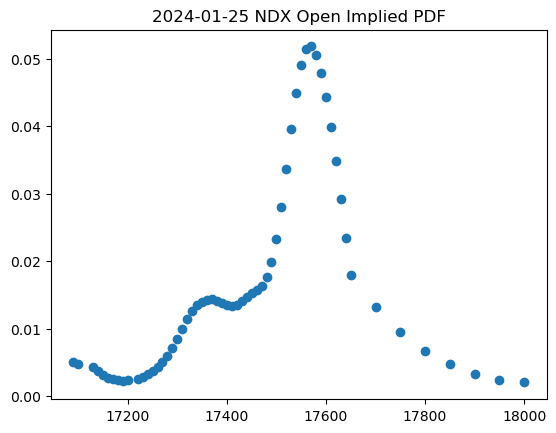

7.001150000000002


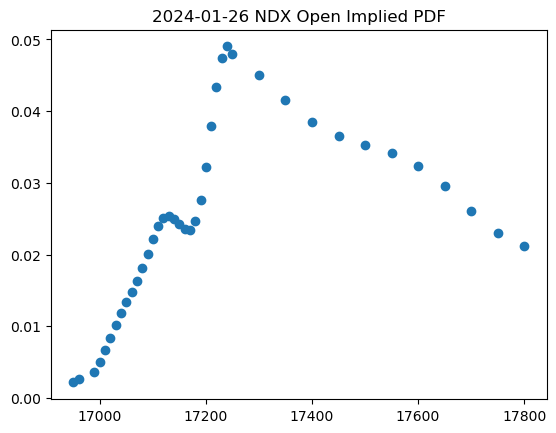

1.5272


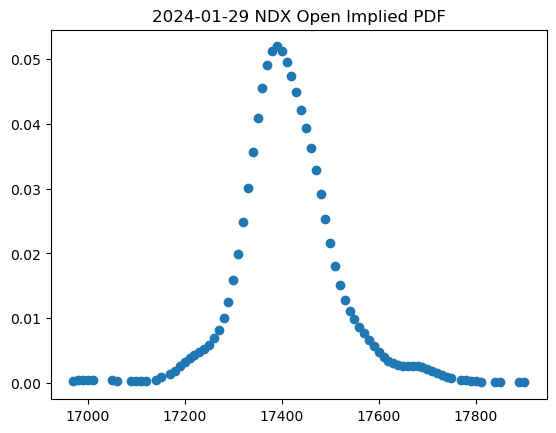

10.70425


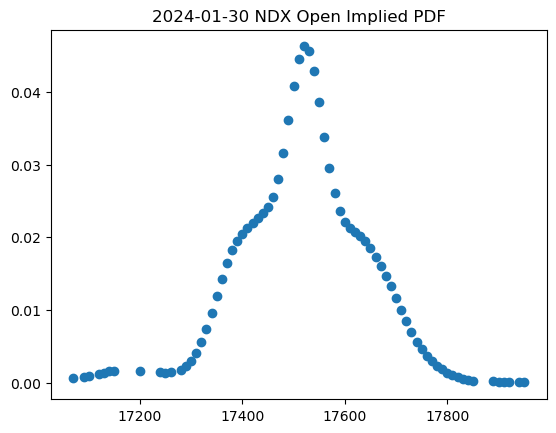

5.934062500000004


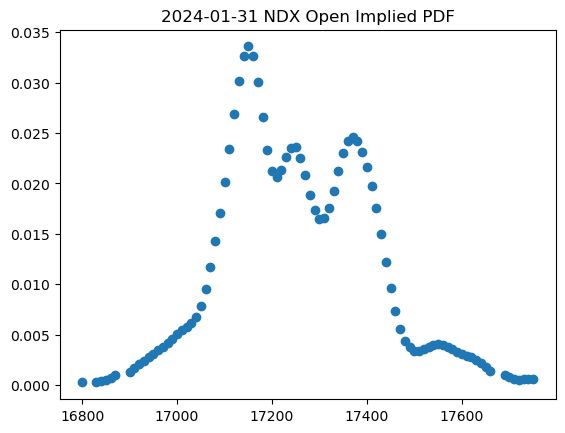

20.959000000000003


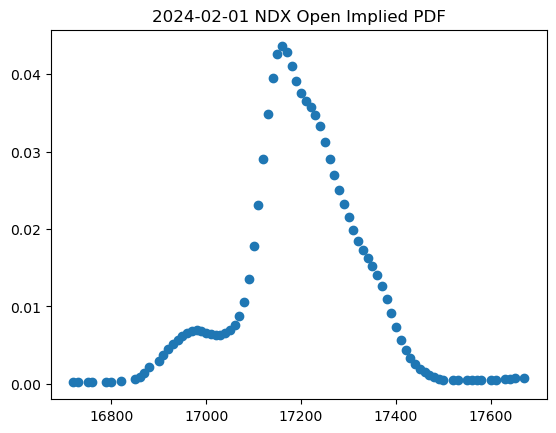

10.255460937500006


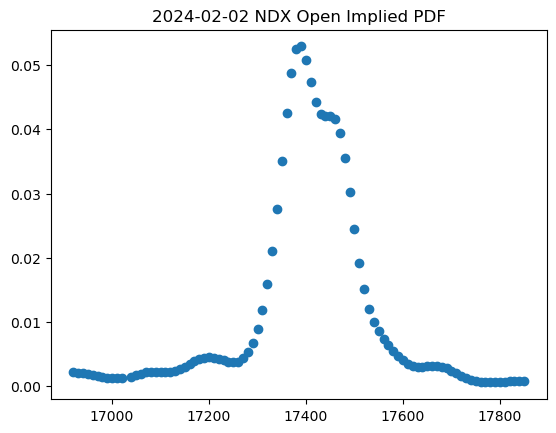

19.668499999999998


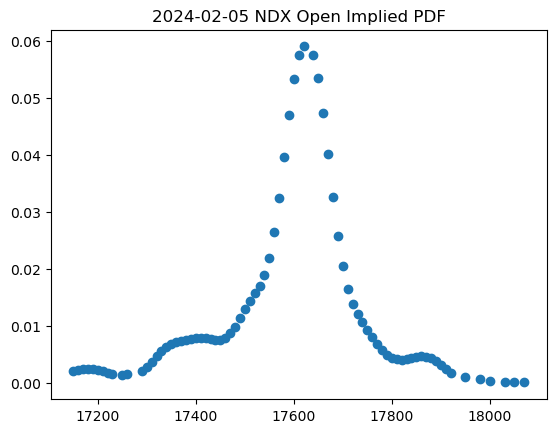

7.3935


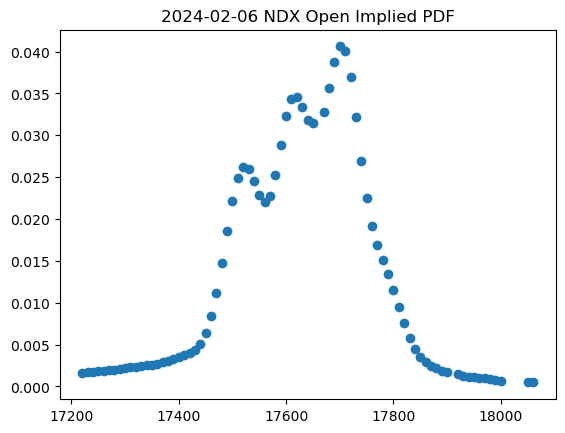

11.9015


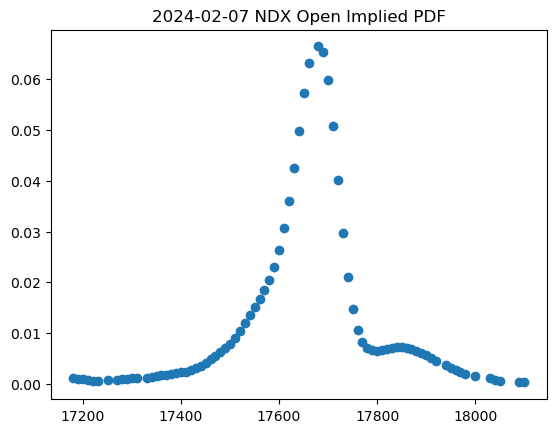

7.043499999999997


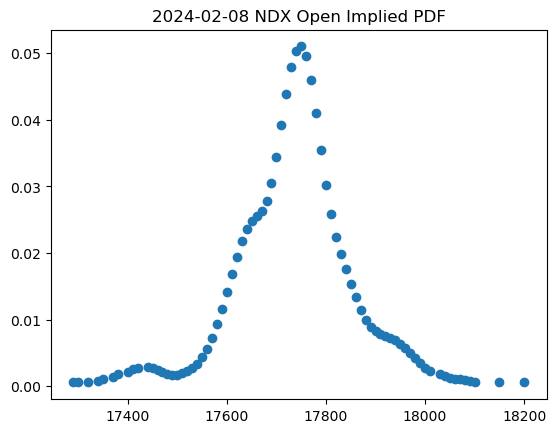

9.566018749999994


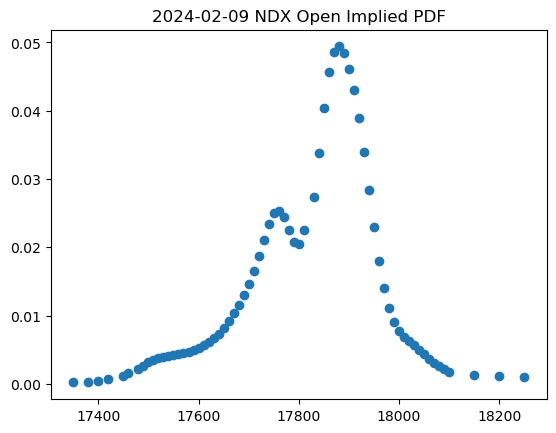

5.272500000000001


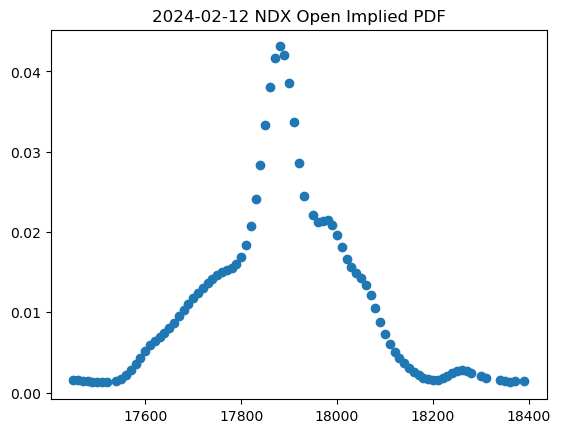

6.141437500000001


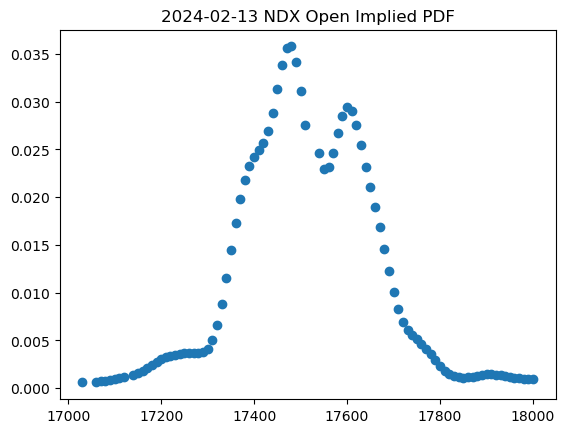

17.74825


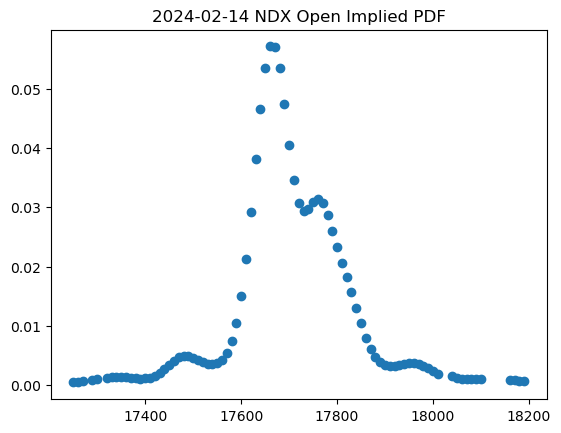

21.115937499999994


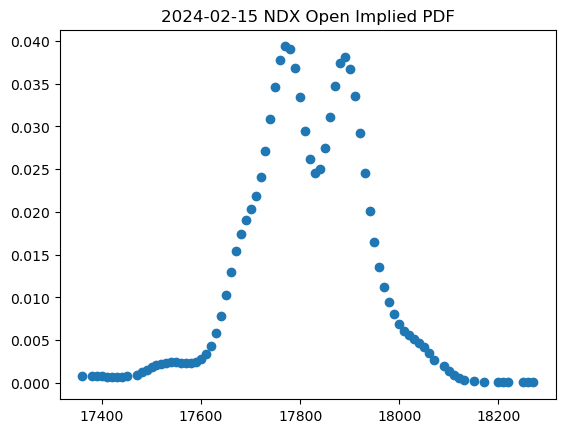

16.127499999999998


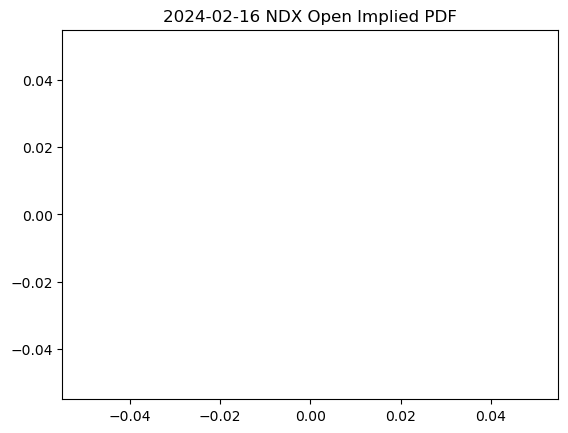

0


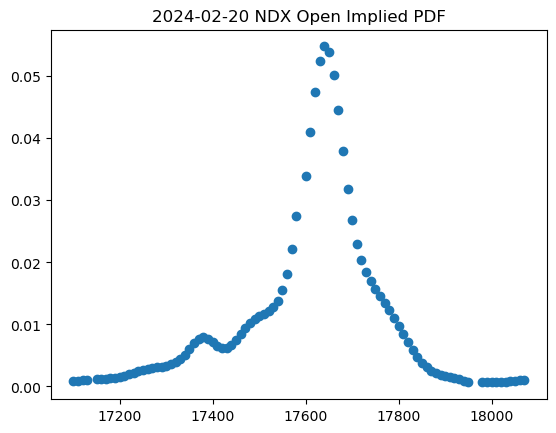

17.666999999999994


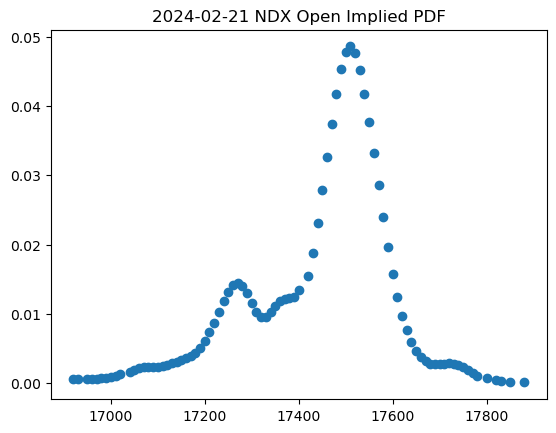

14.857000000000003


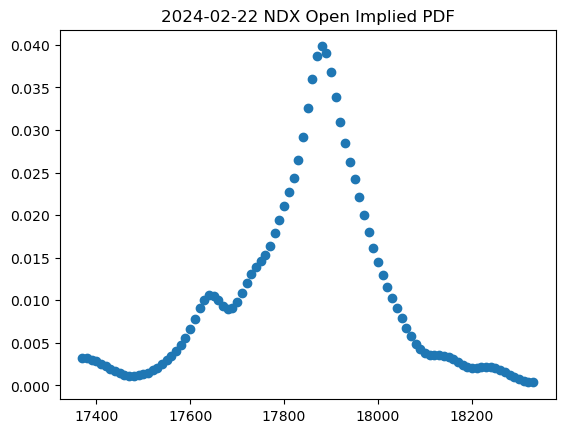

19.797000000000004


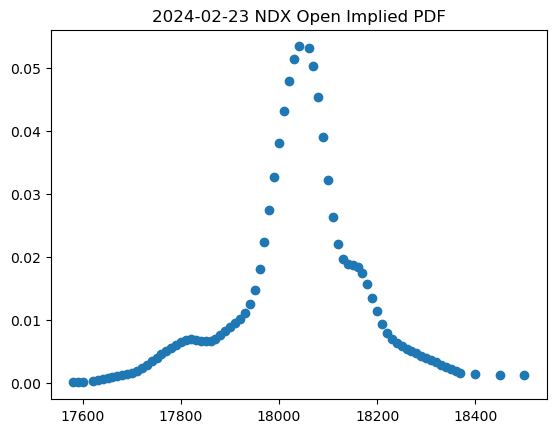

9.456999999999999


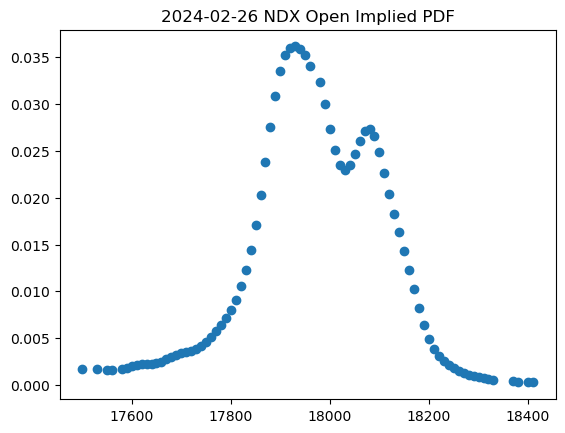

7.258625


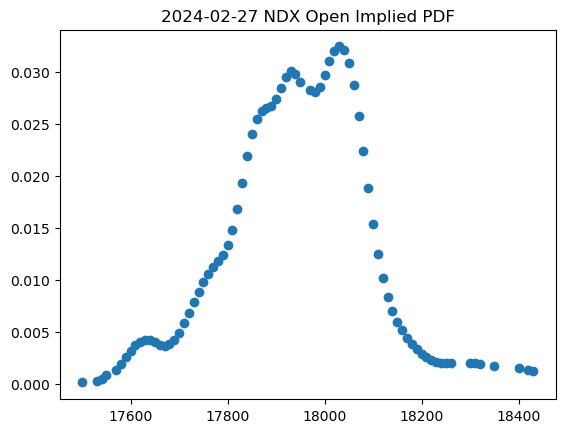

4.379031250000001


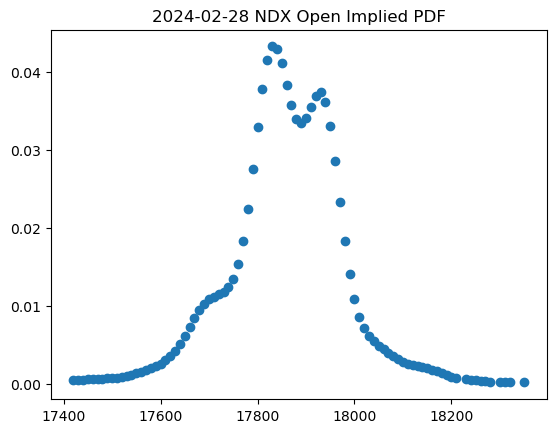

6.442666666666671


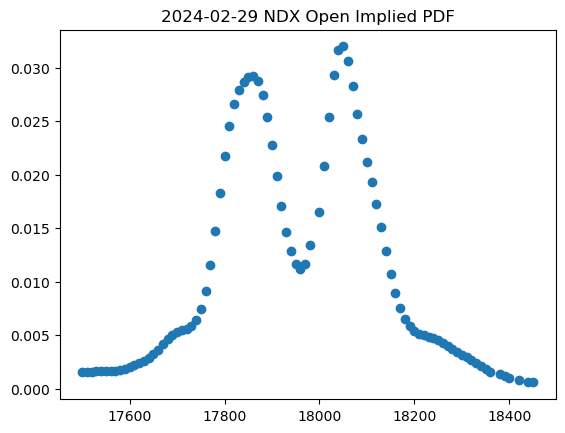

7.353500000000004


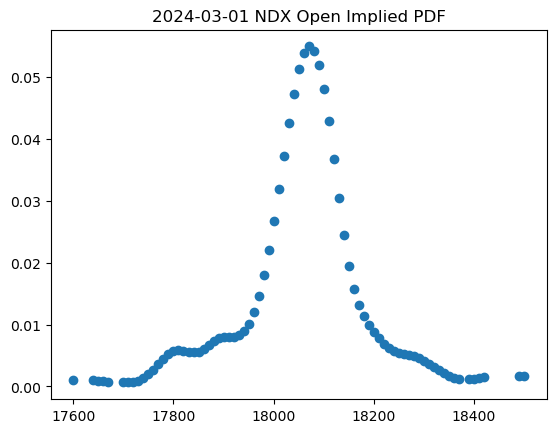

10.349749999999998


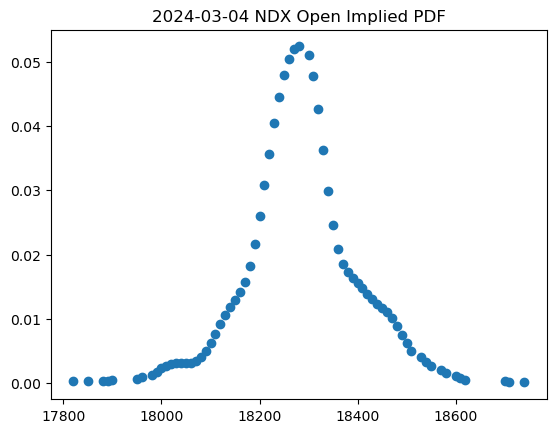

6.128937500000003


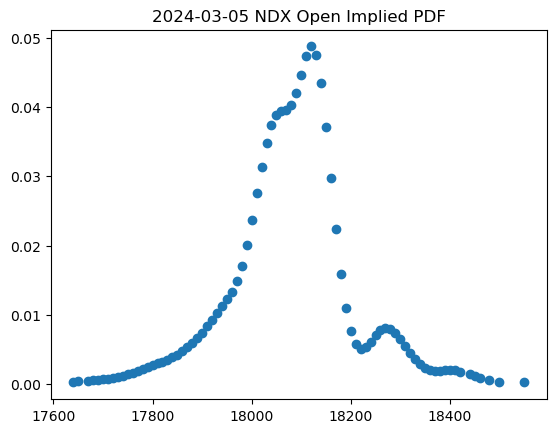

13.027250000000006


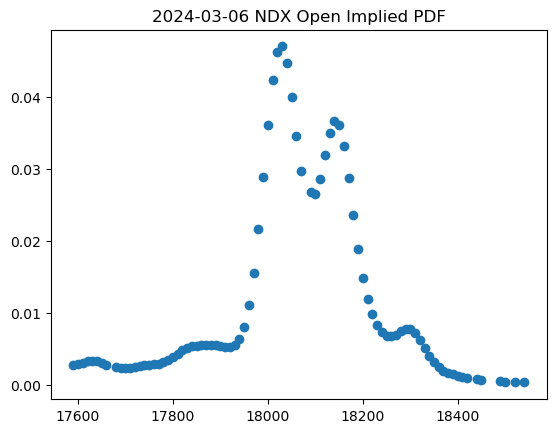

9.008937500000004


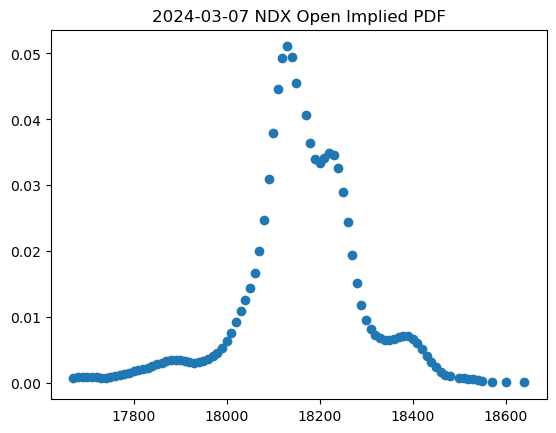

11.0795


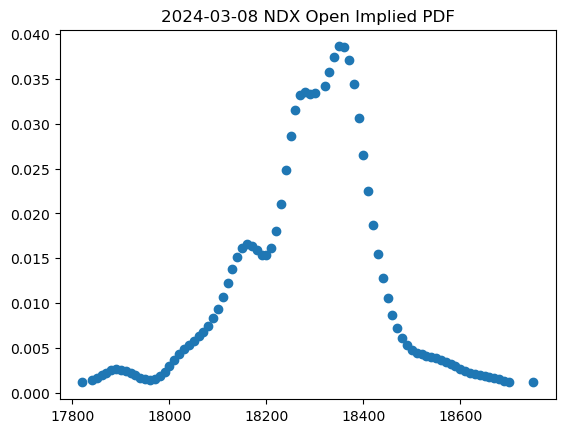

9.751000000000001


In [99]:
'''
using Polygon options data, plots beginning of day implied pdf derived from 0dte option on NDX
'''

for idx, row in ndx_df.iterrows():
    cur_dt = row['Date']
    open_ = row['Open'] - row['Open'] % 5
    close = row['Close']
    temp_calls = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='NDX') & (df['type']=='call') & (df['strike']>open_)]
    temp_puts = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='NDX') & (df['type']=='put') & (df['strike'] < open_)]
    temp_df = pd.concat([temp_calls, temp_puts], ignore_index=True).sort_values(by=['strike']).reset_index(drop=True)
    ndx_dist_dict = {}
    p = 0
    for idx, row in temp_df.iterrows():
        if idx == 0 or idx == temp_df.shape[0]-1:
            continue
        prev_strike = float(temp_df.iloc[idx-1]['strike'])
        cur_strike = row['strike']
        next_strike = float(temp_df.iloc[idx+1]['strike'])

        if next_strike - cur_strike == cur_strike - prev_strike:
            cost = float(temp_df.iloc[idx-1]['open']) + float(temp_df.iloc[idx+1]['open']) - 2 * row['open']
            prof = cur_strike - prev_strike
            p = cost/prof
        else:
            p/=2
        ndx_dist_dict[cur_strike] = max(0,p)

    ndx_probs_smoothed = gaussian_filter1d(list(ndx_dist_dict.values()), 3)
    i = 0
    for k, v in ndx_dist_dict.items():
        ndx_dist_dict[k] = ndx_probs_smoothed[i]/sum(ndx_probs_smoothed)
        i+=1
    plt.scatter(ndx_dist_dict.keys(), ndx_dist_dict.values())
    plt.title('{} NDX Open Implied PDF'.format((cur_dt.isoformat())))
    plt.show()
    print(sum(ndx_probs_smoothed))
    #break

In [107]:
r = np.log(1.05374)

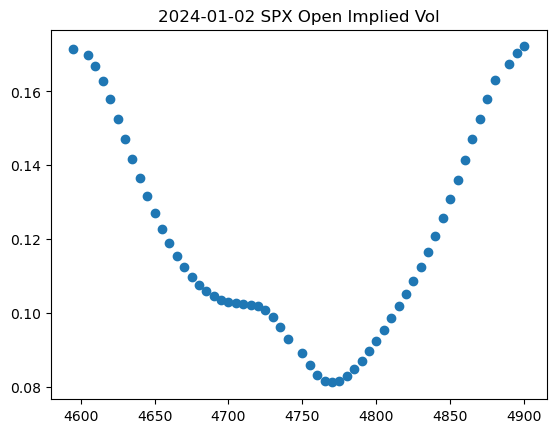

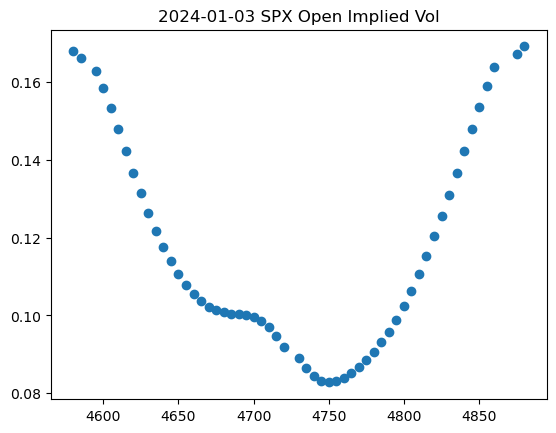

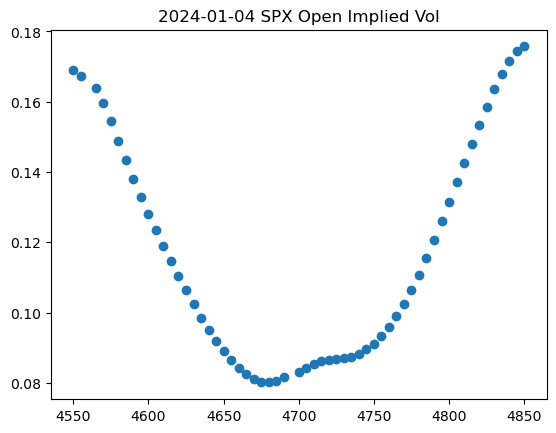

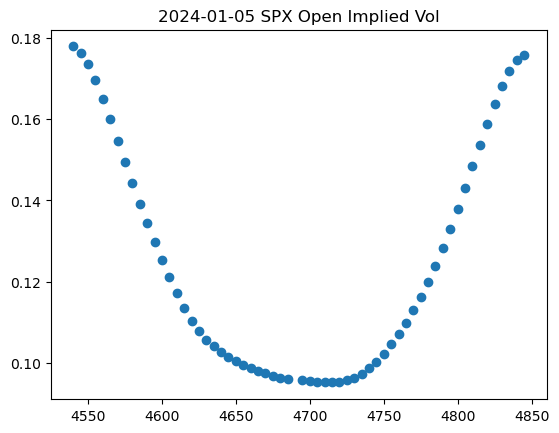

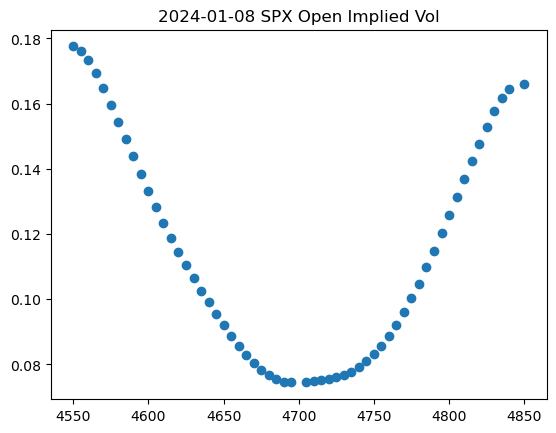

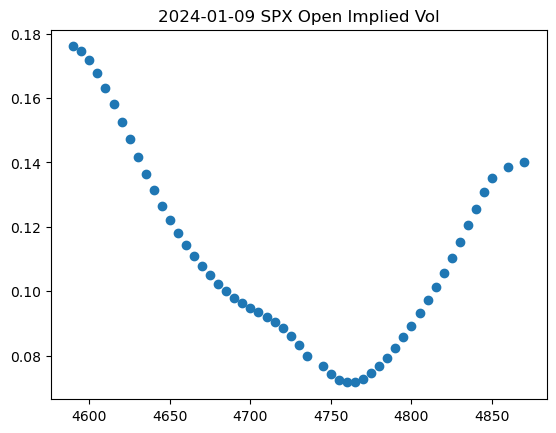

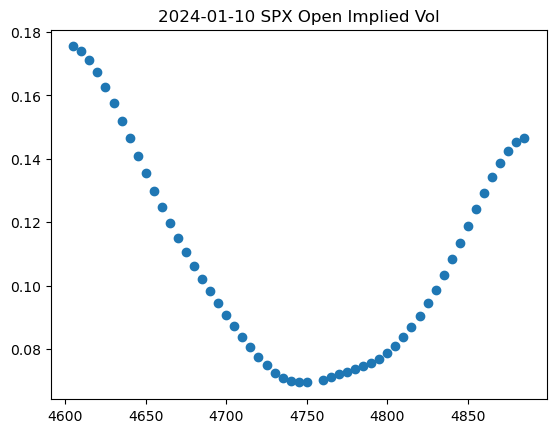

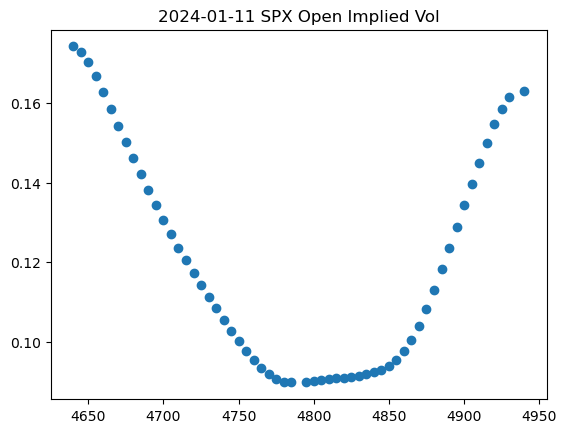

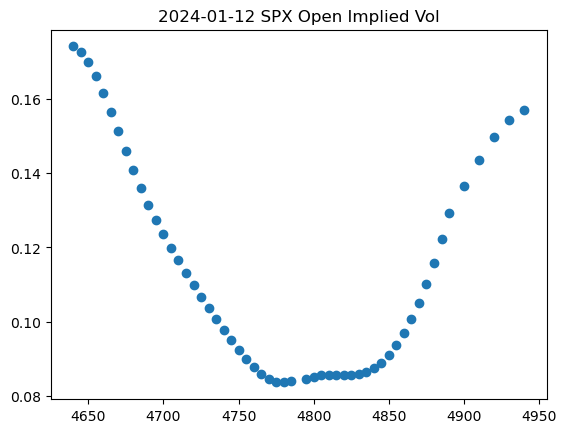

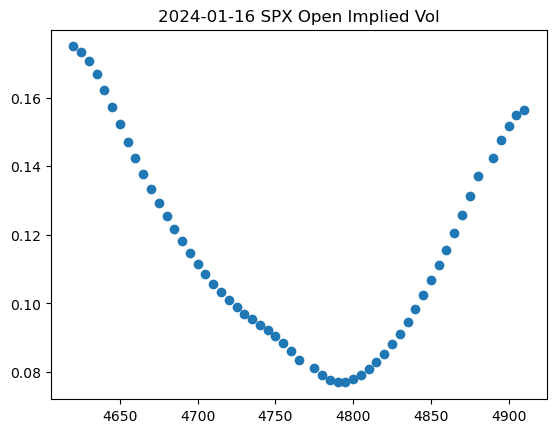

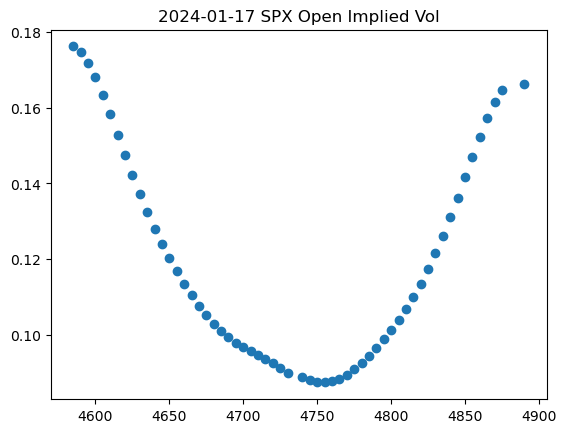

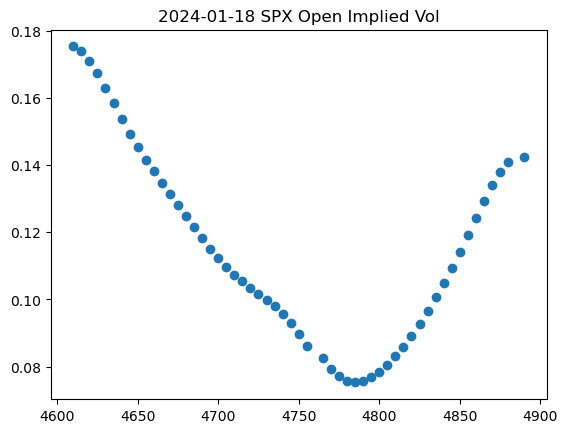

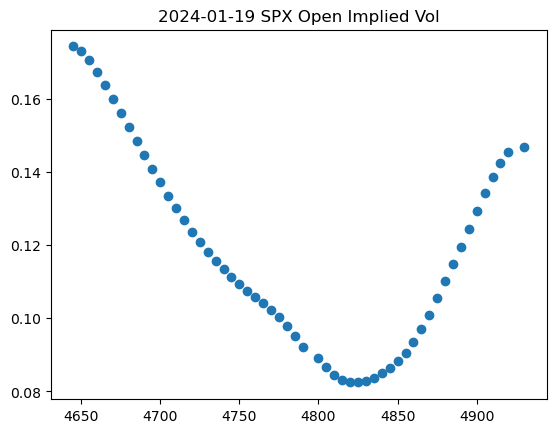

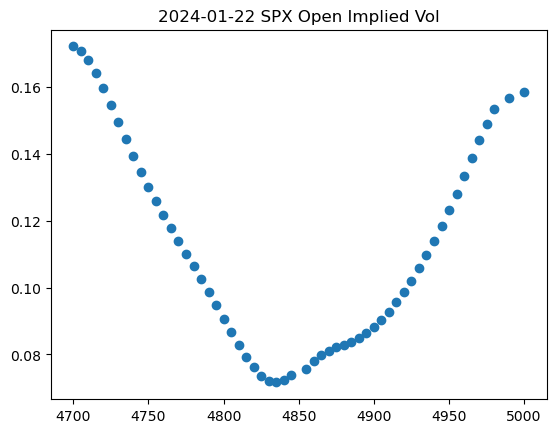

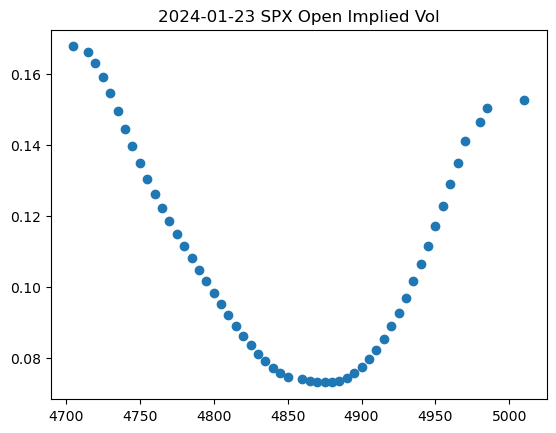

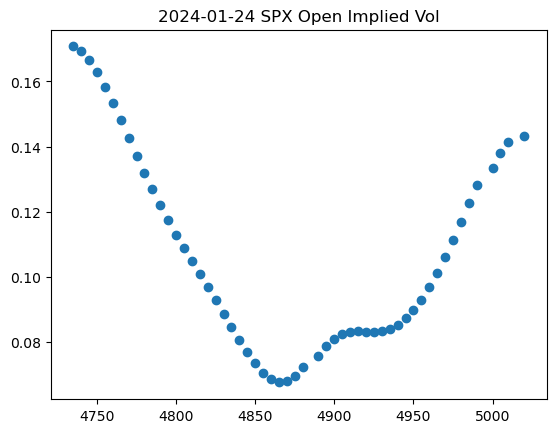

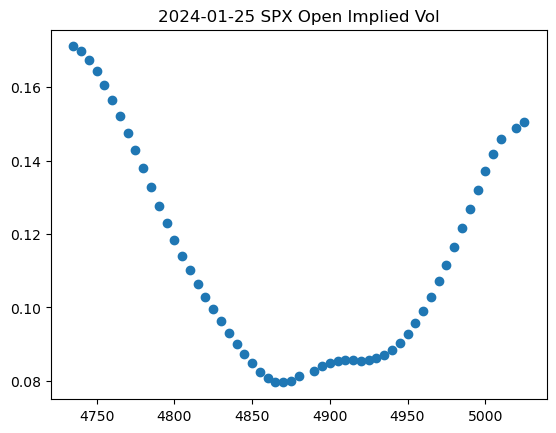

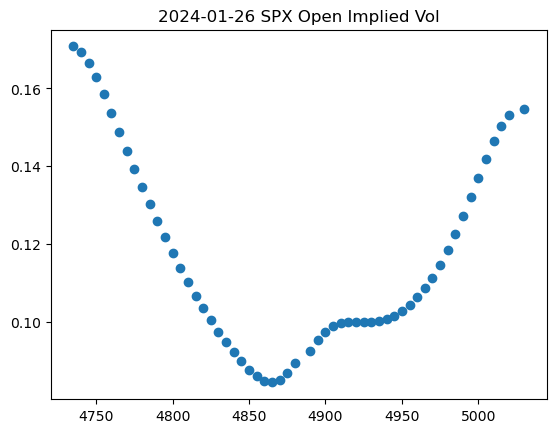

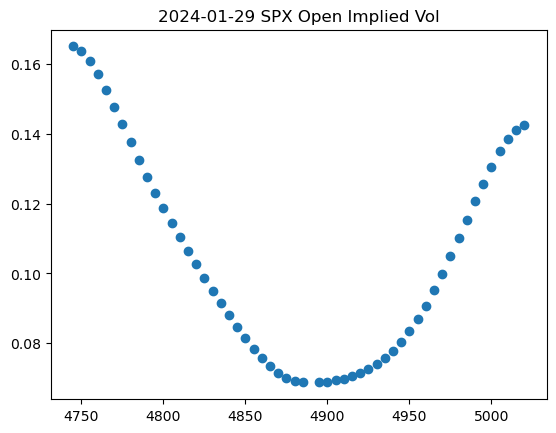

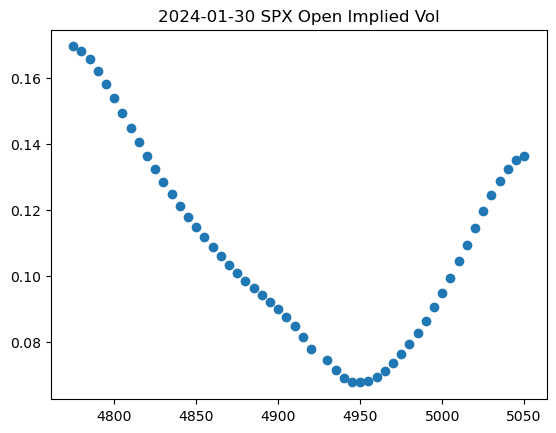

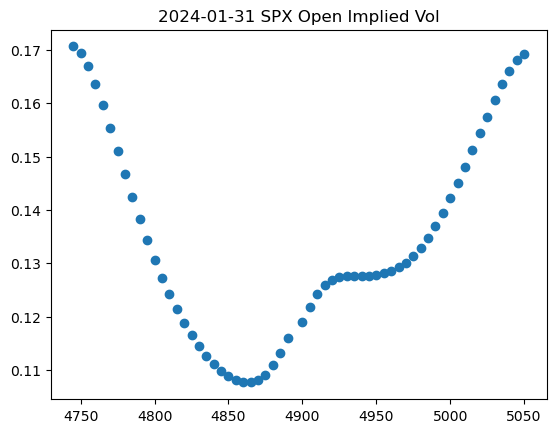

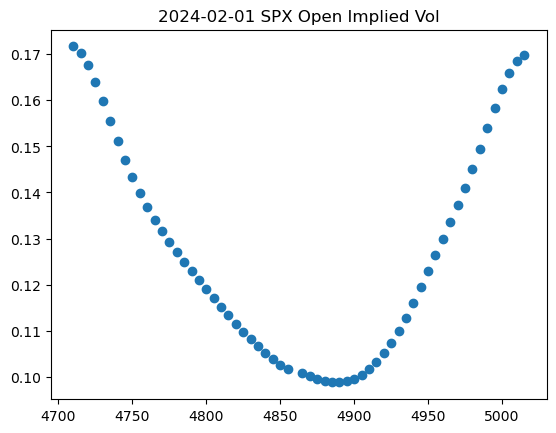

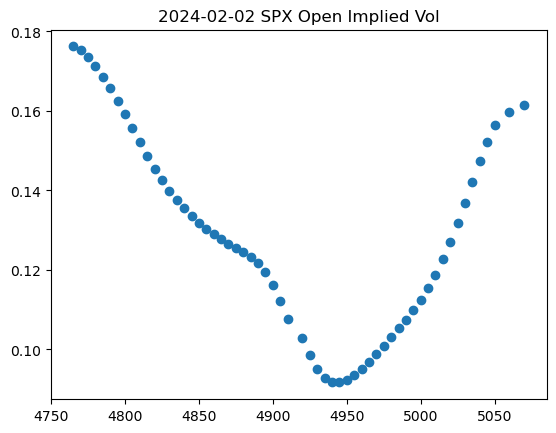

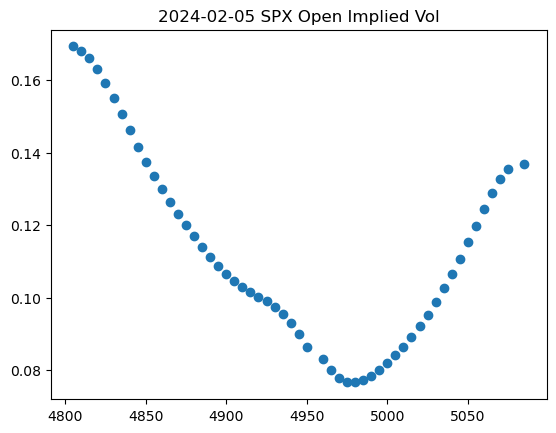

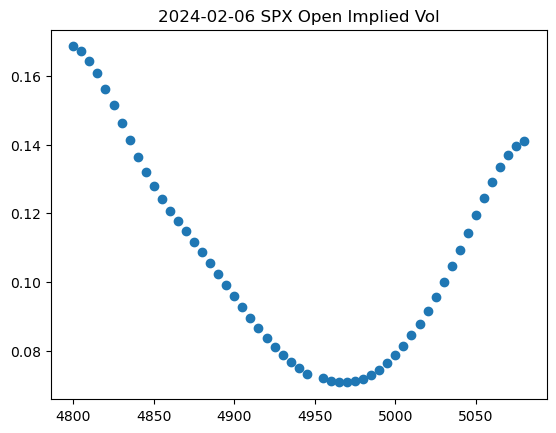

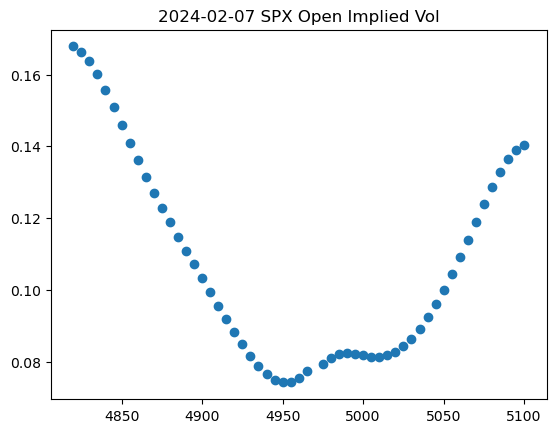

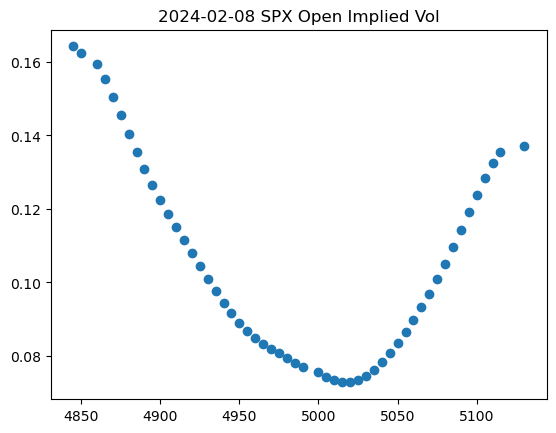

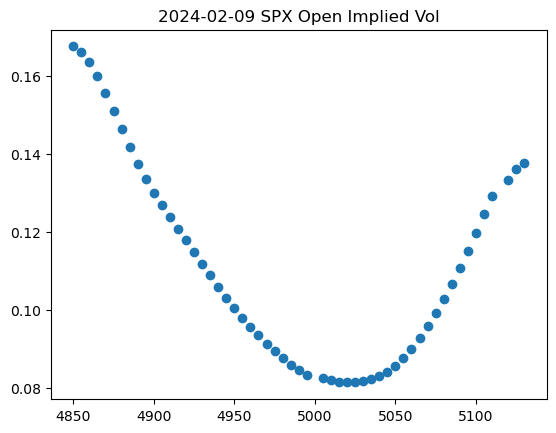

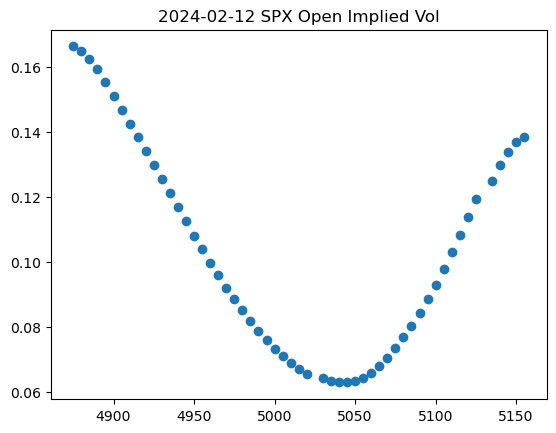

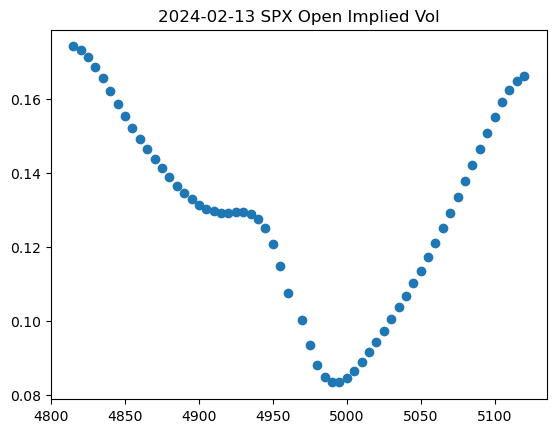

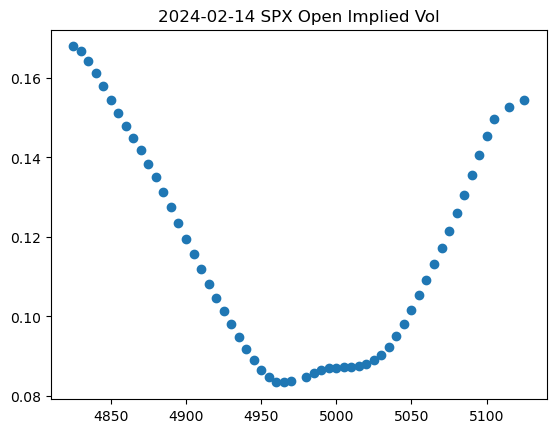

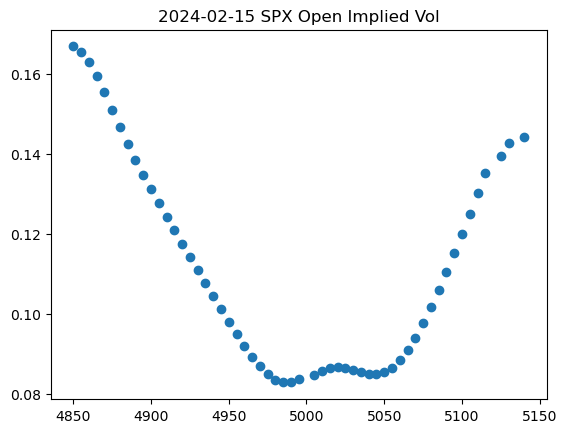

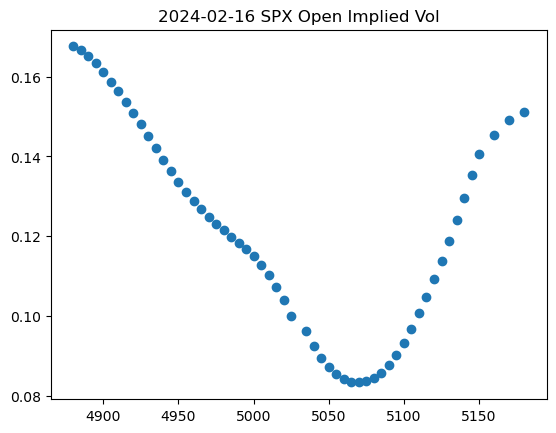

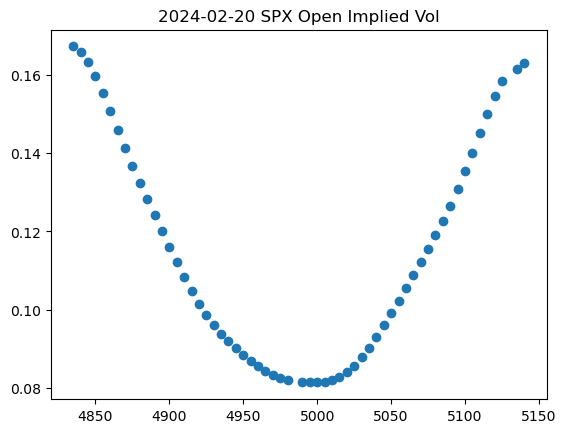

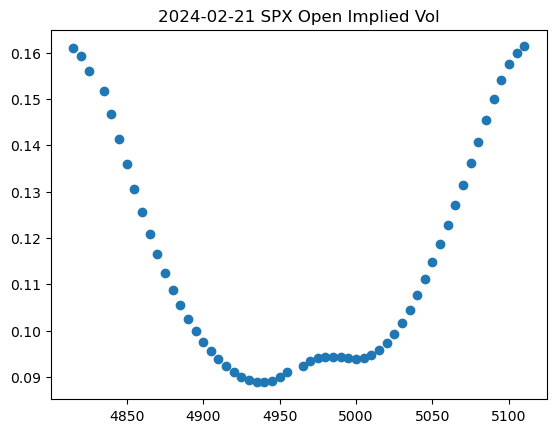

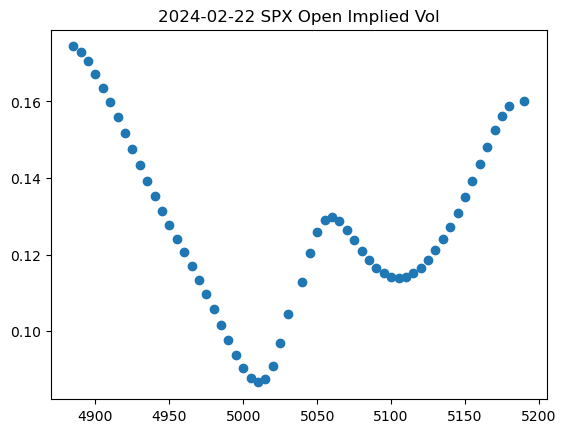

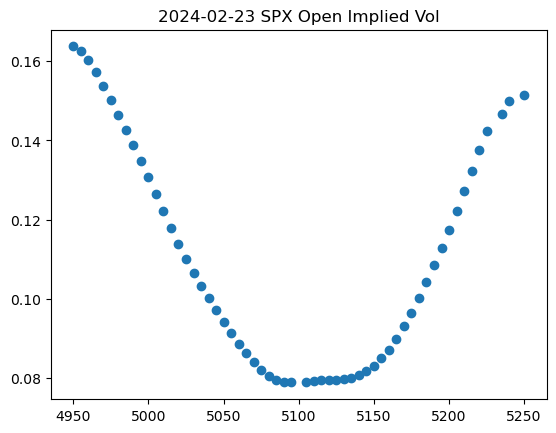

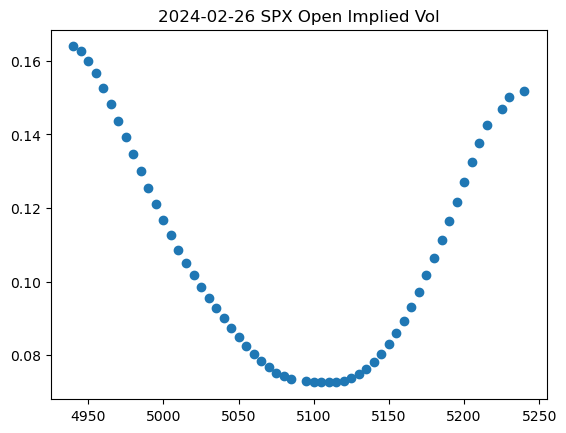

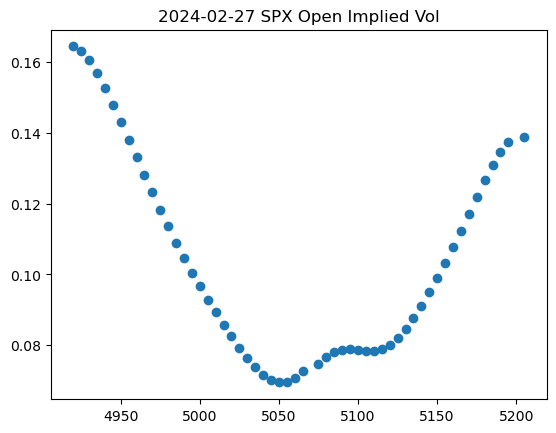

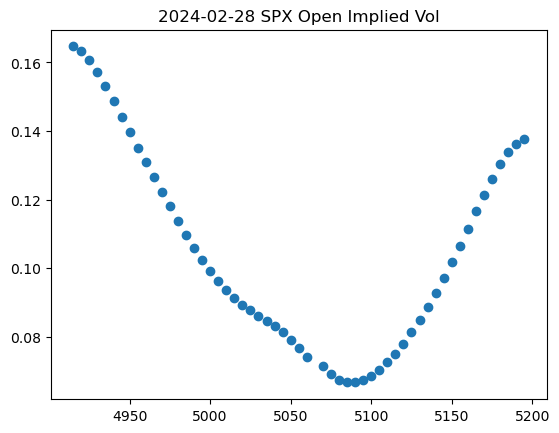

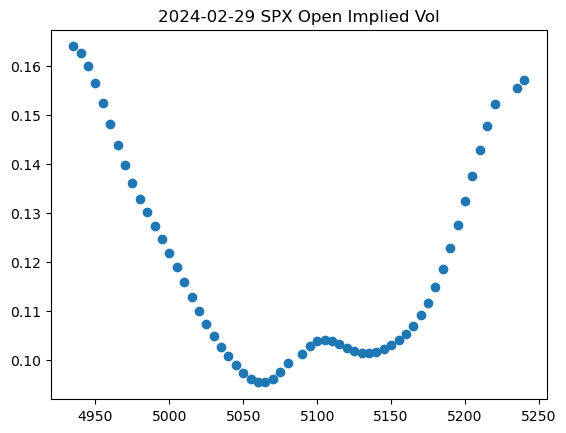

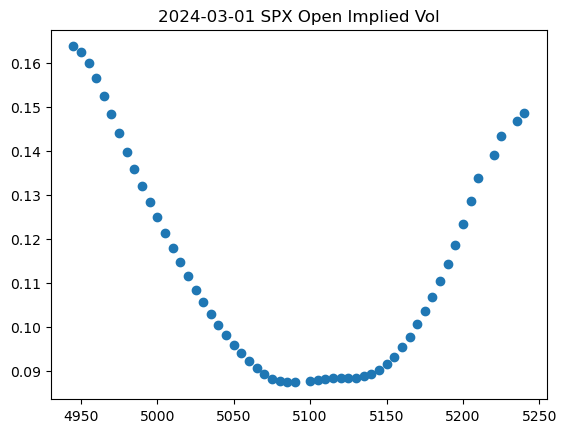

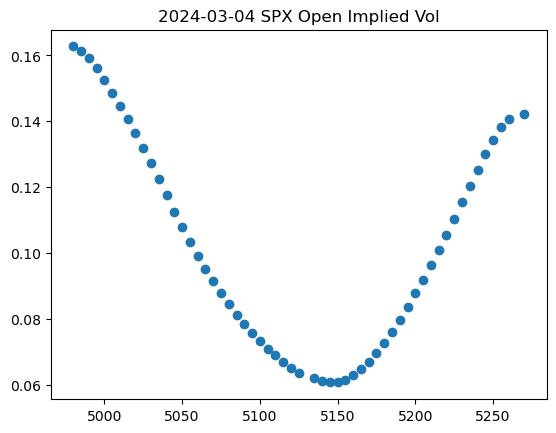

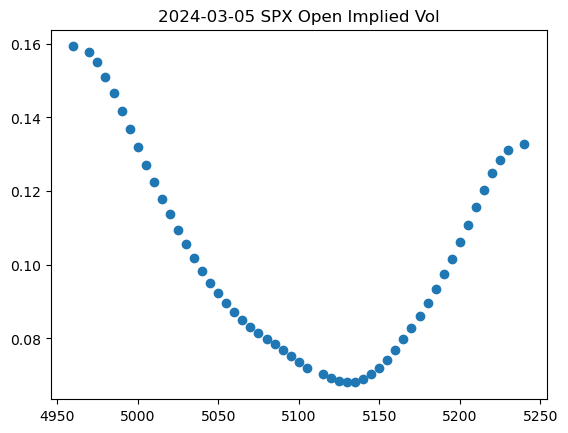

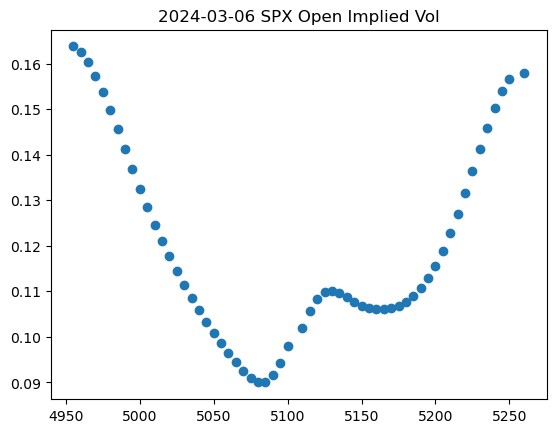

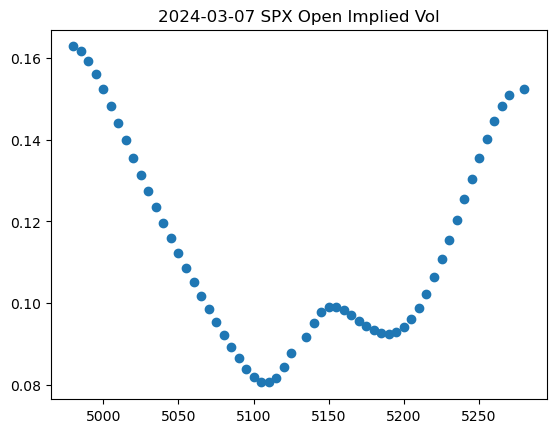

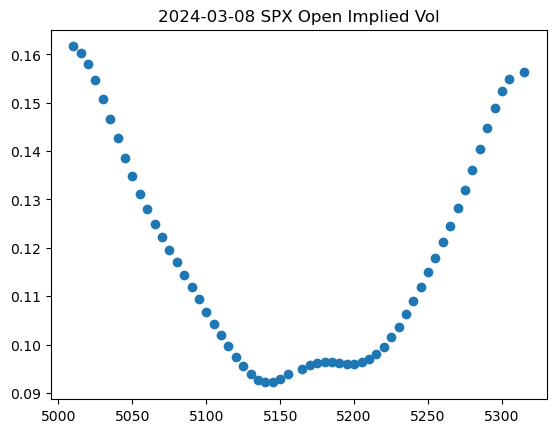

In [128]:
for idx, row in spx_df.iterrows():
    cur_dt = row['Date']
    open_ = row['Open'] - row['Open'] % 5
    close = row['Close']
    temp_calls = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='call') & (df['strike'] > open_)]
    temp_puts = df[(df['ts'] == datetime(cur_dt.year, cur_dt.month, cur_dt.day, 9)) & (df['underlying']=='SPX') & (df['type']=='put') & (df['strike'] < open_)]
    temp_df = pd.concat([temp_calls, temp_puts])
    temp_df = temp_df.sort_values(by=['strike']).reset_index(drop=True)
    temp_df['iv'] = temp_df.apply(lambda x: find_vol_call(x['open'],open_,x['strike'],1/252, r) if x['type'] == 'call' else find_vol_put(x['open'],open_,x['strike'],1/252, r), axis=1)
    spx_dist_dict = {}
    plt.scatter(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
    plt.title('{} SPX Open Implied Vol'.format((cur_dt.isoformat())))
    plt.show()


In [131]:
spx_df.iloc[-1]

Date      2024-03-08
Open     5164.459961
Close    5123.799805
Name: 46, dtype: object

In [129]:
temp_df

,underlying,strike,type,date,ts,open,iv
0,SPX,5010,put,2024-03-08,2024-03-08 09:00:00,0.05,0.171704
1,SPX,5015,put,2024-03-08,2024-03-08 09:00:00,0.05,0.166494
2,SPX,5020,put,2024-03-08,2024-03-08 09:00:00,0.05,0.161276
3,SPX,5025,put,2024-03-08,2024-03-08 09:00:00,0.05,0.156047
4,SPX,5030,put,2024-03-08,2024-03-08 09:00:00,0.05,0.150808
5,SPX,5035,put,2024-03-08,2024-03-08 09:00:00,0.05,0.145557
6,SPX,5040,put,2024-03-08,2024-03-08 09:00:00,0.05,0.140295
7,SPX,5045,put,2024-03-08,2024-03-08 09:00:00,0.05,0.135019
8,SPX,5050,put,2024-03-08,2024-03-08 09:00:00,0.10,0.140015
9,SPX,5055,put,2024-03-08,2024-03-08 09:00:00,0.07,0.129012


In [132]:
cs = CubicSpline(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
temp_df['call_price'] = temp_df.apply(lambda x: bs_call(5164.459961, x['strike'], 1/252, r, x['iv']), axis=1)

In [137]:
bs_call(5164.459961, 5205, 1/252, r,0.095062)

1.502665356616717

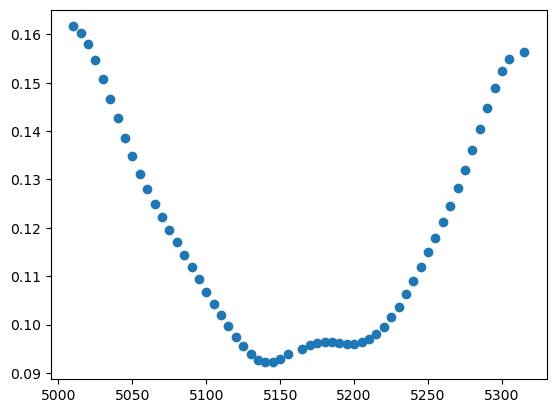

In [139]:
plt.scatter(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))

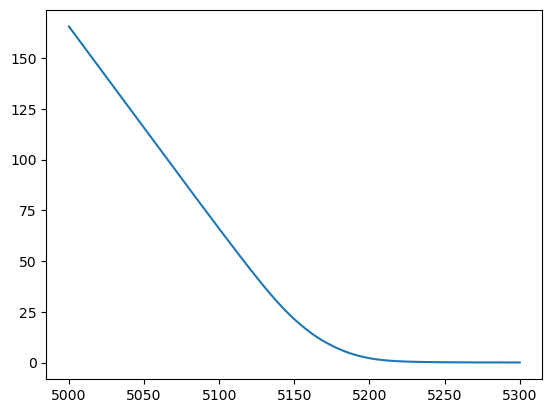

In [144]:
cs = CubicSpline(temp_df['strike'], gaussian_filter1d(temp_df['iv'], 3))
x = np.arange(5000, 5301, 1)
iv_interp = cs(x)
y = []
for i in range(x.shape[0]):
    y.append(bs_call(5164.459961, x[i], 1/252, r, iv_interp[i]))

plt.plot(x, y)

In [145]:
x[0], y[0]

(5000, 165.5067490220208)

In [147]:
x[10], y[10]

(5010, 155.52017603635431)

In [142]:
temp_df

,underlying,strike,type,date,ts,open,iv,call_price
0,SPX,5010,put,2024-03-08,2024-03-08 09:00:00,0.05,0.171704,155.538829
1,SPX,5015,put,2024-03-08,2024-03-08 09:00:00,0.05,0.166494,150.539571
2,SPX,5020,put,2024-03-08,2024-03-08 09:00:00,0.05,0.161276,145.540296
3,SPX,5025,put,2024-03-08,2024-03-08 09:00:00,0.05,0.156047,140.541003
4,SPX,5030,put,2024-03-08,2024-03-08 09:00:00,0.05,0.150808,135.541690
5,SPX,5035,put,2024-03-08,2024-03-08 09:00:00,0.05,0.145557,130.542356
6,SPX,5040,put,2024-03-08,2024-03-08 09:00:00,0.05,0.140295,125.542997
7,SPX,5045,put,2024-03-08,2024-03-08 09:00:00,0.05,0.135019,120.543613
8,SPX,5050,put,2024-03-08,2024-03-08 09:00:00,0.10,0.140015,115.582602
9,SPX,5055,put,2024-03-08,2024-03-08 09:00:00,0.07,0.129012,110.559765
